In [277]:
# 读取数据
from pathlib import Path
import pandas as pd
path = Path("20250816+CPET处理后变量+血液数据+诊断2553条.csv")

# 1) 正确读 CSV（自动识别分隔符；尝试常见编码）
last_err = None
for enc in ["utf-8-sig", "gbk", "cp932"]:
    try:
        df = pd.read_csv(path, sep=None, engine="python", encoding=enc)
        break
    except Exception as e:
        last_err = e
else:
    raise last_err

# 2) 如果 CSV 里保存了旧索引（常见列名 "Unnamed: 0" 或类似），把它设为索引
for idx_col in ["Unnamed: 0", "index", "Index"]:
    if idx_col in df.columns:
        df = df.set_index(idx_col)
        break

# 删除所有 ID 为缺失的行
initial_row_count = df.shape[0]
df = df.dropna(subset=['ID'])
rows_dropped = initial_row_count - df.shape[0]
print(rows_dropped)

# ✅ 中文字体设置
sns.set(font='SimHei', font_scale=1.0)
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [299]:
# 标签分组
blood_vars=['RBC分布宽度CV(RDW-CV)', '单核细胞比率(MON%)', '单核细胞数(MON#)', '红细胞压积(HCT)',
       '淋巴细胞百分比(LYMP%)', '淋巴细胞绝对值(LYMP#)', '平均红细胞体积(MCV)', '平均血红蛋白含量(MCH)',
       '平均血红蛋白浓度(MCHC)', '嗜碱粒比率(BASO%)', '嗜碱性粒细胞数(BAS#)', '嗜酸粒比率(EOS%)',
       '嗜酸性粒细胞数(EOS#)', '血红蛋白(HGB)', '中性粒细胞比率(GRAN%)', '中性粒细胞绝对值(GRAN#)',
       'RBC分布宽度SD(RDW-SD)', '平均血小板体积(MPV)', '血小板分布宽度(PDW)', '血小板容积(PCT)',
       '幼稚粒细胞(IG%)', '幼稚粒细胞绝对值(IG#)', '酸碱度(PH)', '比重(SG)', '尿酸[UA]', '肌酐[Cr]',
       '尿素[Urea]', '丙氨酸氨基转移酶[ALT]', '白蛋白[ALB]', '总蛋白[TP]', '白球蛋白比值[A/G]',
       '球蛋白[GLB]', '低密度脂蛋白胆固醇[LDL-C]', '高密度脂蛋白胆固醇[HDL-C]', '总胆红素测定[TBIL]',
       '葡萄糖(空腹)[GLU]', '甘油三脂[TG]', '总胆固醇[CHO]', '总胆汁酸[TBA]', '乳酸脱氢酶[LDH]',
       '肌酸激酶[CK]', 'α-羟丁酸脱氢酶[HBDH]']

cpet_vars=['卧位心室率',
       '峰值心率', '峰值功率', '峰值氧脉', 'VE/VCO2斜率.1', '静息血压-收缩压', '静息血压-舒张压', 'FVC',
       'VCmax', 'FEV1', 'FEV1/FVC', 'MVV', '运动中最高收缩压', '运动终止后3分钟收缩压',
       '运动中最高舒张压', '运动终止后3分钟舒张压', '运动终止后1分钟心率', '运动终止后2分钟心率', '运动终止后3分钟心率',
       '峰值氧耗', '峰值公斤氧耗', '峰值分钟通气量', '呼吸商', '每分钟通气量(毫升)', 'load-maxload',
       'VO2-AT', 'VCO2-AT', 'VCO2-Max.Load', 'VCO2/kg-AT', 'VCO2/kg-Max.Load',
       'HR-AT', 'HR-Max.Load', 'BPsys-AT', 'BPsys-Max.Load', 'BPdia_AT',
       'BPdia-Max.Load', 'VE-AT', 'VT-AT', 'f-ergo-AT', 'BR-AT',
       'EQO2-Max.Load', 'EQCO2-Max.Load', 'PETO2-AT', 'PETO2-Max.Load',
       'PETCO2-AT', 'PETCO2-Max.Load', 'MAX BP*HR', 'Threshold Power']

TARGET=['Age']

basic_vars=['Sex', 'Weight', 'Height', 'BMI']

In [283]:
# 显示工具 全显示
import pandas as pd

# 显示所有列
pd.set_option('display.max_columns', None)

# 显示所有行
pd.set_option('display.max_rows', None)

# 设置每列内容的最大显示宽度，避免内容被截断
pd.set_option('display.max_colwidth', None)

# 设置显示宽度，避免换行
pd.set_option('display.width', None)

In [ ]:
# 显示工具 部分显示
# 恢复显示列数为默认
pd.reset_option("display.max_columns")

# 恢复显示行数为默认
pd.reset_option("display.max_rows")

# 恢复最大列宽为默认
pd.reset_option("display.max_colwidth")

# 恢复总显示宽度为默认
pd.reset_option("display.width")



=== OOF 结果（CPET-only） ===
          Model       MAE       RMSE        R2  SpearmanR
0           SVR  6.973118   8.960133  0.597821   0.771213
1       XGBoost  7.019428   9.061180  0.588699   0.761082
2          HGBR  7.169042   9.246343  0.571718   0.749750
3      LightGBM  7.194482   9.269875  0.569535   0.750317
4  RandomForest  7.293734   9.357742  0.561336   0.746443
5       LassoCV  7.604599  18.123150 -0.645346   0.760722
6  ElasticNetCV  7.641794  18.266229 -0.671428   0.759412
7       RidgeCV  7.674329  18.416972 -0.699129   0.758364
8           KNN  7.926765   9.997365  0.499319   0.704594


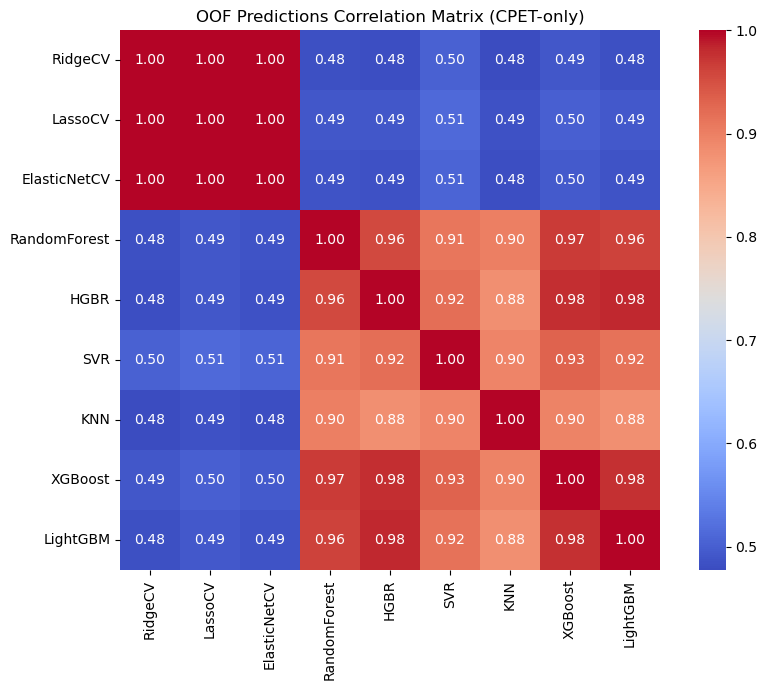

In [301]:
# 阶段1 基模型
# ========= 配置 =========
USE_BLOOD = False  # 只用CPET -> False；CPET+血液 -> True
N_SPLITS = 10
RANDOM_STATE = 42

# ========= 特征与目标 =========
# 你已有：cpet_vars, blood_vars, basic_vars, df['Age'], df['诊断']
feature_cols = basic_vars + cpet_vars + (blood_vars if USE_BLOOD else [])
X_all = df[feature_cols].apply(pd.to_numeric, errors="coerce")  # 强制数值化（异常变NaN交给插补）
y_all = df["Age"].astype(float)

# 若Sex不是0/1，映射一下
if X_all["Sex"].dtype == object:
    X_all["Sex"] = X_all["Sex"].map({"M":1,"F":0,"男":1,"女":0}).astype(float)

# ========= 分层划分（Sex + Age分箱）=========
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold

age_bins_all = pd.cut(y_all, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
strata_all = X_all["Sex"].astype(int).astype(str) + "_" + age_bins_all.astype(str)

X_tr, X_va, y_tr, y_va, strata_tr_all, strata_va = train_test_split(
    X_all, y_all, strata_all, test_size=0.2, random_state=RANDOM_STATE, stratify=strata_all
)

# ========= 模型池 =========
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    "RidgeCV": RidgeCV(alphas=np.logspace(-3,2,12), cv=3),
    "LassoCV": LassoCV(alphas=np.logspace(-3,2,12), cv=3, max_iter=10000, random_state=RANDOM_STATE),
    "ElasticNetCV": ElasticNetCV(alphas=np.logspace(-3,2,12), l1_ratio=[0.2,0.5,0.8], cv=3, max_iter=10000, random_state=RANDOM_STATE),
    "RandomForest": RandomForestRegressor(n_estimators=500, random_state=RANDOM_STATE, n_jobs=-1),
    "HGBR": HistGradientBoostingRegressor(learning_rate=0.05, max_iter=500, random_state=RANDOM_STATE),
    "SVR": SVR(kernel="rbf", C=10, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=10),
}
try:
    from xgboost import XGBRegressor
    models["XGBoost"] = XGBRegressor(
        n_estimators=1000, learning_rate=0.03, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=RANDOM_STATE, n_jobs=-1, tree_method="hist"
    )
except Exception as e:
    print(f"[Info] xgboost 不可用：{e}")

try:
    from lightgbm import LGBMRegressor
    models["LightGBM"] = LGBMRegressor(
        n_estimators=1200, learning_rate=0.03, num_leaves=63,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        min_data_in_leaf=20, min_gain_to_split=0.0, feature_fraction=1.0,
        random_state=RANDOM_STATE, n_jobs=-1, verbosity=-1
    )
except Exception as e:
    print(f"[Info] lightgbm 不可用：{e}")

NEED_SCALING = {"RidgeCV","LassoCV","ElasticNetCV","SVR","KNN"}

# ========= 折内管线（无泄漏）：插补→去常量→(标准化)→模型 =========
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

def make_pipe(name, model):
    steps = [
        ("imputer", SimpleImputer(strategy="median")),
        ("varth", VarianceThreshold(0.0)),  # 清除常量列，缓解LGBM警告
    ]
    if name in NEED_SCALING:
        steps.append(("scaler", StandardScaler()))
    steps.append(("model", model))
    return Pipeline(steps)

# ========= 10折 OOF =========
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import spearmanr

skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
age_bins_tr = pd.cut(y_tr, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
strata_tr = X_tr["Sex"].astype(int).astype(str) + "_" + age_bins_tr.astype(str)

oof = pd.DataFrame(index=X_tr.index); rows=[]
for name, mdl in models.items():
    pred = np.zeros(len(X_tr))
    for tr_idx, va_idx in skf.split(X_tr, strata_tr):
        Xi_tr, Xi_va = X_tr.iloc[tr_idx], X_tr.iloc[va_idx]
        yi_tr, yi_va = y_tr.iloc[tr_idx], y_tr.iloc[va_idx]
        pipe = make_pipe(name, mdl)
        pipe.fit(Xi_tr, yi_tr)
        pred[va_idx] = pipe.predict(Xi_va)
    oof[name] = pred
    mae = mean_absolute_error(y_tr, pred)
    rmse = mean_squared_error(y_tr, pred, squared=False)
    r2 = r2_score(y_tr, pred)
    rho, _ = spearmanr(y_tr, pred)
    rows.append({"Model": name, "MAE": mae, "RMSE": rmse, "R2": r2, "SpearmanR": rho})

import pandas as pd
metrics_df = pd.DataFrame(rows).sort_values("MAE").reset_index(drop=True)
print("\n=== OOF 结果（{}） ===".format("CPET+血液" if USE_BLOOD else "CPET-only"))
print(metrics_df)

# ========= 相关矩阵（热图）=========
import seaborn as sns, matplotlib.pyplot as plt
corr = oof.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("OOF Predictions Correlation Matrix ({})".format("CPET+Blood" if USE_BLOOD else "CPET-only"))
plt.tight_layout(); plt.show()

# 可选保存
metrics_df.to_csv("oof_metrics.csv", index=False)
corr.to_csv("oof_correlation.csv")


In [374]:
# === A1. 5折 OOF：SVR/XGB/LGBM/HGBR/RF/KNN → 条形图 + 相关热图 ===
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

OUT="figs_pub"; os.makedirs(OUT, exist_ok=True)

# 准备数据（你已定义）
X = df[cpet_vars].apply(pd.to_numeric, errors="coerce"); y = pd.to_numeric(df["Age"], errors="coerce")
keep = X.dropna().index.intersection(y.dropna().index); X=X.loc[keep]; y=y.loc[keep]
age_bins = pd.cut(y, [0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
strata = df.loc[keep, "Sex"].astype(int).astype(str) + "_" + age_bins.astype(str)

models = {
    "SVR": Pipeline([("sc", StandardScaler()), ("m", SVR(C=3.0, epsilon=0.1, kernel="rbf"))]),
    "XGBoost": Pipeline([("sc", StandardScaler(with_mean=False)), ("m", XGBRegressor(
        n_estimators=600, learning_rate=0.03, max_depth=4, subsample=0.8, colsample_bytree=0.8,
        reg_lambda=1.0, random_state=42, n_jobs=-1, tree_method="hist"))]),
    "LightGBM": LGBMRegressor(n_estimators=1500, learning_rate=0.02, num_leaves=31,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0, random_state=42, n_jobs=-1),
    "HGBR": HistGradientBoostingRegressor(max_depth=None, learning_rate=0.05, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=600, random_state=42, n_jobs=-1),
    "KNN": Pipeline([("sc", StandardScaler()), ("m", KNeighborsRegressor(n_neighbors=15))]),
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof = {}; metrics=[]
for name, mdl in models.items():
    pred = np.zeros(len(X))
    for tr, va in skf.split(X, strata):
        Xi_tr, Xi_va, yi_tr = X.iloc[tr], X.iloc[va], y.iloc[tr]
        if name=="LightGBM":
            mdl.fit(Xi_tr, yi_tr, eval_set=[(Xi_va, y.iloc[va])], eval_metric="l2",
                    callbacks=[] )
            pred[va] = mdl.predict(Xi_va)
        else:
            mdl.fit(Xi_tr, yi_tr)
            pred[va] = mdl.predict(Xi_va)
    oof[name]=pred
    rmse = mean_squared_error(y, pred, squared=False); mae=mean_absolute_error(y,pred)
    r2 = 1 - ( (pred-y).var()*len(y) / ((y-y.mean())**2).sum() )
    metrics.append([name, mae, rmse, r2])

m = pd.DataFrame(metrics, columns=["Model","MAE","RMSE","R2"]).sort_values("RMSE")
m.to_csv("stage2_runs/oof_metrics_cpet_only.csv", index=False)
print(m)

# 条形图
plt.figure(figsize=(7,4)); plt.bar(m["Model"], m["RMSE"]); plt.ylabel("OOF RMSE"); plt.xticks(rotation=45)
plt.title("单模型 OOF RMSE（CPET-only）"); plt.tight_layout()
plt.savefig(f"{OUT}/S2A_oof_rmse_bar.png", dpi=300); plt.close()

# 预测相关热图
P = pd.DataFrame(oof); corr = P.corr()
plt.figure(figsize=(6,5)); plt.imshow(corr.values, aspect="auto"); plt.colorbar(label="Pearson r")
plt.xticks(range(len(corr)), corr.columns, rotation=45); plt.yticks(range(len(corr)), corr.index)
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        plt.text(j,i,f"{corr.values[i,j]:.2f}", ha="center", va="center")
plt.title("OOF 预测相关热图"); plt.tight_layout()
plt.savefig(f"{OUT}/S2B_oof_pred_correlation.png", dpi=300); plt.close()
print("Saved S2A/S2B to figs_pub/")


          Model       MAE      RMSE        R2
1       XGBoost  7.045787  9.035028  0.577721
0           SVR  7.131880  9.100439  0.571724
3          HGBR  7.073858  9.101392  0.571470
2      LightGBM  7.169039  9.214452  0.560770
4  RandomForest  7.245653  9.287680  0.553785
5           KNN  7.787702  9.753544  0.509624
Saved S2A/S2B to figs_pub/


In [ ]:
# 阶段2堆叠模型
import time, os, json, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV, LinearRegression
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# ================== 参数 ==================
RANDOM_STATE = 42
USE_BLOOD    = False          # 只用 CPET+basic；如需 + blood_vars 改 True
OUT_DIR      = "stage2_runs"  # 中间结果存放
N_SPLITS     = 10             # 外层折数（FAST_MODE=True 时会降到 5）
INNER_SPLITS = 10             # 内层折数（FAST_MODE=True 时会降到 5）
FAST_MODE    = True            # True: 单层stacking且 5 折，极大提速（探索用）
PRINT_EVERY  = 1              # 每多少折打印一次
MIN_DELTA    = 0.02           # 前向集成最小改进阈值（单位：OOF_RMSE）
os.makedirs(OUT_DIR, exist_ok=True)

def log(msg):
    print(f"[{time.strftime('%H:%M:%S')}] {msg}", flush=True)

# ================== 特征/目标 ==================
feature_cols = basic_vars + cpet_vars + (blood_vars if USE_BLOOD else [])
X_all = df[feature_cols].apply(pd.to_numeric, errors="coerce").copy()
y_all = df["Age"].astype(float).copy()

if X_all["Sex"].dtype == object:
    X_all["Sex"] = X_all["Sex"].map({"M":1,"F":0,"男":1,"女":0}).astype(float)

age_bins_all = pd.cut(y_all, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
strata_all   = X_all["Sex"].astype(int).astype(str) + "_" + age_bins_all.astype(str)

X_tr, X_va, y_tr, y_va, strata_tr_all, strata_va = train_test_split(
    X_all, y_all, strata_all, test_size=0.2, random_state=RANDOM_STATE, stratify=strata_all
)

# ================== 模型池（树系 + SVR/KNN） ==================
models = {
    "SVR": SVR(kernel="rbf", C=10, epsilon=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=600, random_state=RANDOM_STATE, n_jobs=-1),
    "HGBR": HistGradientBoostingRegressor(learning_rate=0.05, max_iter=600, random_state=RANDOM_STATE),
    "KNN": KNeighborsRegressor(n_neighbors=10),
}
HAVE_XGB = HAVE_LGBM = False
try:
    from xgboost import XGBRegressor
    models["XGBoost"] = XGBRegressor(
        n_estimators=4000, learning_rate=0.02, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        random_state=RANDOM_STATE, n_jobs=-1, tree_method="hist", verbosity=0
    )
    HAVE_XGB = True
except Exception as e:
    log(f"xgboost 不可用：{e}")
try:
    from lightgbm import LGBMRegressor
    models["LightGBM"] = LGBMRegressor(
        n_estimators=4000, learning_rate=0.02, num_leaves=63,
        subsample=0.8, colsample_bytree=0.8, reg_lambda=1.0,
        min_data_in_leaf=20, min_gain_to_split=0.0, feature_fraction=1.0,
        random_state=RANDOM_STATE, n_jobs=-1, verbosity=-1
    )
    HAVE_LGBM = True
except Exception as e:
    log(f"lightgbm 不可用：{e}")

NEED_SCALING = {"SVR","KNN"}  # 树不需要

def make_pipe(name, model):
    steps = [("imputer", SimpleImputer(strategy="median")),
             ("varth", VarianceThreshold(0.0))]
    if name in NEED_SCALING:
        steps.append(("scaler", StandardScaler()))
    steps.append(("model", model))
    return Pipeline(steps)

# ================== 1) 训练集 OOF + 验证集预测（带进度） ==================
def fit_one_model_OOF(name, mdl, X, y, strata=None, n_splits=10, print_every=1, fast=False):
    import time
    from sklearn.model_selection import StratifiedKFold
    t0 = time.perf_counter()
    if fast:
        n_splits = 5

    # 分层标签（Age bins + Sex）
    age_bins = pd.cut(y, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
    strata_tr = X["Sex"].astype(int).astype(str) + "_" + age_bins.astype(str)
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_STATE)

    def _fit_with_es(pipe, Xi_tr, yi_tr, Xi_va, yi_va):
        """对 XGBoost/LightGBM 做“尽力早停”；其余模型原样返回。"""
        if name == "XGBoost":
            # 重新实例化以避免状态污染
            try:
                from xgboost import XGBRegressor
                est = pipe.named_steps["model"]
                est = XGBRegressor(**est.get_params())
                pipe.steps[-1] = ("model", est)
            except Exception:
                return pipe.fit(Xi_tr, yi_tr)

            # 方案A：原生 early_stopping_rounds
            try:
                pipe.fit(Xi_tr, yi_tr,
                         model__eval_set=[(Xi_va, yi_va)],
                         model__early_stopping_rounds=100,
                         model__verbose=False)
                return pipe
            except TypeError:
                pass
            # 方案B：callbacks
            try:
                import xgboost as xgb
                pipe = make_pipe(name, mdl)  # 重新构建
                est = pipe.named_steps["model"]
                est.set_params(**est.get_params())  # no-op, 占位
                pipe.fit(Xi_tr, yi_tr,
                         model__eval_set=[(Xi_va, yi_va)],
                         model__callbacks=[xgb.callback.EarlyStopping(
                             rounds=100, save_best=True, maximize=False
                         )])
                return pipe
            except Exception:
                # 方案C：不早停
                pipe = make_pipe(name, mdl)
                return pipe.fit(Xi_tr, yi_tr)

        elif name == "LightGBM":
            try:
                from lightgbm import LGBMRegressor
                est = pipe.named_steps["model"]
                est = LGBMRegressor(**est.get_params())
                pipe.steps[-1] = ("model", est)
            except Exception:
                return pipe.fit(Xi_tr, yi_tr)

            # 方案A：原生 early_stopping_rounds
            try:
                pipe.fit(Xi_tr, yi_tr,
                         model__eval_set=[(Xi_va, yi_va)],
                         model__eval_metric="l2",
                         model__early_stopping_rounds=100,
                         model__verbose=-1)
                return pipe
            except TypeError:
                pass
            # 方案B：callbacks
            try:
                from lightgbm import early_stopping, log_evaluation
                pipe = make_pipe(name, mdl)
                pipe.fit(Xi_tr, yi_tr,
                         model__eval_set=[(Xi_va, yi_va)],
                         model__callbacks=[early_stopping(100), log_evaluation(0)])
                return pipe
            except Exception:
                pipe = make_pipe(name, mdl)
                return pipe.fit(Xi_tr, yi_tr)

        else:
            return pipe.fit(Xi_tr, yi_tr)

    oof = np.zeros(len(X))
    fold = 0
    for tr_idx, va_idx in skf.split(X, strata_tr):
        fold += 1
        Xi_tr, Xi_va = X.iloc[tr_idx], X.iloc[va_idx]
        yi_tr, yi_va = y.iloc[tr_idx], y.iloc[va_idx]

        pipe = make_pipe(name, mdl)
        if name in ("XGBoost", "LightGBM"):
            pipe = _fit_with_es(pipe, Xi_tr, yi_tr, Xi_va, yi_va)
        else:
            pipe.fit(Xi_tr, yi_tr)

        oof[va_idx] = pipe.predict(Xi_va)

        if print_every and (fold % print_every == 0):
            mae = mean_absolute_error(yi_va, oof[va_idx])
            rmse = mean_squared_error(yi_va, oof[va_idx], squared=False)
            log(f"{name} | fold {fold}/{n_splits} | MAE={mae:.3f} RMSE={rmse:.3f} | {time.perf_counter()-t0:.1f}s")

    # —— 训练集全量拟合，用于外部验证集预测 ——
    pipe_full = make_pipe(name, mdl)
    if name in ("XGBoost", "LightGBM"):
        pipe_full = _fit_with_es(pipe_full, X, y, X_va, y_va)
    else:
        pipe_full.fit(X, y)
    pred_val = pipe_full.predict(X_va)

    # 落盘（不中断也有结果）
    pd.Series(oof, index=X.index, name=name).to_csv(os.path.join(OUT_DIR, f"oof_{name}.csv"))
    pd.Series(pred_val, index=X_va.index, name=name).to_csv(os.path.join(OUT_DIR, f"valpred_{name}.csv"))

    oof_mae  = mean_absolute_error(y, oof)
    oof_rmse = mean_squared_error(y, oof, squared=False)
    oof_r2   = r2_score(y, oof)
    log(f"{name} | OOF MAE={oof_mae:.3f} RMSE={oof_rmse:.3f} R2={oof_r2:.3f} | total {time.perf_counter()-t0:.1f}s")
    return oof, pred_val


log("=== 开始基模型 OOF/验证集预测 ===")
oof_tr = pd.DataFrame(index=X_tr.index)
pred_va = {}
for name, mdl in models.items():
    oof, pv = fit_one_model_OOF(name, mdl, X_tr, y_tr, strata=None,
                                n_splits=N_SPLITS, print_every=PRINT_EVERY, fast=FAST_MODE)
    oof_tr[name] = oof
    pred_va[name] = pv

metrics = []
for name in oof_tr.columns:
    metrics.append([name,
                    mean_absolute_error(y_tr, oof_tr[name]),
                    mean_squared_error(y_tr, oof_tr[name], squared=False),
                    r2_score(y_tr, oof_tr[name])])
metrics_df = pd.DataFrame(metrics, columns=["Model","MAE","RMSE","R2"]).sort_values("MAE")
metrics_df.to_csv(os.path.join(OUT_DIR, "oof_metrics.csv"), index=False)
log("OOF 基准：\n" + str(metrics_df))

In [318]:
# ================== 2) 前向集成（带最小改进阈值） ==================
from sklearn.linear_model import Ridge

def forward_select(oof_df, y, min_delta=0.0):
    remaining = list(oof_df.columns)
    selected, best_rmse = [], np.inf
    while True:
        improved = False
        best_add, best_alpha, best_score = None, None, None
        for m in remaining:
            Xmeta = oof_df[selected + [m]].values
            meta  = RidgeCV(alphas=np.logspace(-3,2,30), cv=5)
            meta.fit(Xmeta, y.values)
            pred  = meta.predict(Xmeta)
            rmse  = mean_squared_error(y, pred, squared=False)
            gain  = best_rmse - rmse
            if rmse < best_rmse - 1e-9 and gain >= min_delta:
                best_rmse, best_add, best_alpha, best_score = rmse, m, meta.alpha_, gain
                improved = True
        if improved:
            selected.append(best_add)
            remaining.remove(best_add)
            log(f"[Forward] add {best_add}, OOF_RMSE -> {best_rmse:.4f} (gain {best_score:.4f}, alpha={best_alpha:.3g})")
        else:
            break
    return selected, best_rmse

log(f"=== 前向集成（MIN_DELTA={MIN_DELTA}） ===")
selected, _ = forward_select(oof_tr, y_tr, min_delta=MIN_DELTA)
if not selected:
    # 若阈值过严没选中，就选 OOF 最好的前1个
    selected = [metrics_df.iloc[0,0]]
log(f"Selected base models: {selected}")

# 元学习器
X_meta_tr = oof_tr[selected].values
meta = RidgeCV(alphas=np.logspace(-3,2,30), cv=5); meta.fit(X_meta_tr, y_tr.values)

# 验证集融合
P_va = np.column_stack([pred_va[m] for m in selected])
cpAge_pred_val = meta.predict(P_va)
mae_val  = mean_absolute_error(y_va, cpAge_pred_val)
rmse_val = mean_squared_error(y_va, cpAge_pred_val, squared=False)
r2_val   = r2_score(y_va, cpAge_pred_val)
log(f"[Validation] Stacking({selected}) | MAE={mae_val:.3f} RMSE={rmse_val:.3f} R2={r2_val:.3f}")

# 同时输出最佳单模型
best_single = None; best_mae = 1e9
for name, pv in pred_va.items():
    mae = mean_absolute_error(y_va, pv)
    if mae < best_mae:
        best_mae, best_single = mae, name
rmse_single = mean_squared_error(y_va, pred_va[best_single], squared=False)
r2_single   = r2_score(y_va, pred_va[best_single])
log(f"[Validation] Best single = {best_single} | MAE={best_mae:.3f} RMSE={rmse_single:.3f} R2={r2_single:.3f}")

# ================== 3) 生成全样本 cpAge-OOF / acAge-OOF（修正后的 FAST 分支） ==================
if FAST_MODE:
    log("=== 生成 cpAge/acAge（FAST 5x5 嵌套） ===")
    OUT_K = 5
    IN_K  = 5
    from sklearn.model_selection import StratifiedKFold

    # 外层分层标签（Age分箱 + Sex）
    age_bins_all2 = pd.cut(y_all, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
    strata_all2   = X_all["Sex"].astype(int).astype(str) + "_" + age_bins_all2.astype(str)

    outer = StratifiedKFold(n_splits=OUT_K, shuffle=True, random_state=RANDOM_STATE)
    cpAge_oof = np.zeros(len(X_all))

    fold = 0
    for tr_idx, va_idx in outer.split(X_all, strata_all2):
        fold += 1
        t1 = time.perf_counter()

        Xo_tr, Xo_va = X_all.iloc[tr_idx], X_all.iloc[va_idx]
        yo_tr, yo_va = y_all.iloc[tr_idx], y_all.iloc[va_idx]

        # —— 训练块的分层标签（供内层 OOF）——
        age_bins_tr = pd.cut(yo_tr, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
        strata_tr   = Xo_tr["Sex"].astype(int).astype(str) + "_" + age_bins_tr.astype(str)
        inner = StratifiedKFold(n_splits=IN_K, shuffle=True, random_state=RANDOM_STATE)

        # 每个基模型：训练块内 OOF（给元模型训练） + 外层验证块预测
        inner_oof_mat = np.zeros((len(Xo_tr), len(selected)))   # 形状对齐 yo_tr
        P_outer_va    = np.zeros((len(Xo_va), len(selected)))   # 形状对齐 yo_va

        for j, m in enumerate(selected):
            # —— 内层 OOF（训练元模型用）——
            oof_tr_m = np.zeros(len(Xo_tr))
            it_fold = 0
            for it_tr, it_va in inner.split(Xo_tr, strata_tr):
                it_fold += 1
                Xi_tr, Xi_va = Xo_tr.iloc[it_tr], Xo_tr.iloc[it_va]
                yi_tr, yi_va = yo_tr.iloc[it_tr], yo_tr.iloc[it_va]
                pipe = make_pipe(m, models[m])
                pipe.fit(Xi_tr, yi_tr)
                oof_tr_m[it_va] = pipe.predict(Xi_va)
            inner_oof_mat[:, j] = oof_tr_m

            # —— 外层验证块预测（用于生成该折 cpAge）——
            pipe_full = make_pipe(m, models[m])
            pipe_full.fit(Xo_tr, yo_tr)
            P_outer_va[:, j] = pipe_full.predict(Xo_va)

        # —— 在训练块的 inner-OOF 上拟合元模型 —— 
        meta_fold = RidgeCV(alphas=np.logspace(-3,2,30), cv=5)
        meta_fold.fit(inner_oof_mat, yo_tr.values)

        # —— 生成该折的 cpAge —— 
        cpAge_oof[va_idx] = meta_fold.predict(P_outer_va)

        if PRINT_EVERY and (fold % PRINT_EVERY == 0):
            rmse_fold = mean_squared_error(yo_va, cpAge_oof[va_idx], squared=False)
            log(f"FAST nested fold {fold}/{OUT_K} done | val RMSE={rmse_fold:.3f} | {time.perf_counter()-t1:.1f}s")

else:
    # —— 严格嵌套版（更慢更严谨）
    log("=== 生成 cpAge/acAge（严格 嵌套 OOF） ===")
    cpAge_oof = np.zeros(len(X_all))
    outer = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    age_bins_all2 = pd.cut(y_all, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
    strata_all2   = X_all["Sex"].astype(int).astype(str) + "_" + age_bins_all2.astype(str)

    fold = 0
    for tr_idx, va_idx in outer.split(X_all, strata_all2):
        fold += 1
        t1 = time.perf_counter()

        Xo_tr, Xo_va = X_all.iloc[tr_idx], X_all.iloc[va_idx]
        yo_tr, yo_va = y_all.iloc[tr_idx], y_all.iloc[va_idx]

        inner = StratifiedKFold(n_splits=INNER_SPLITS, shuffle=True, random_state=RANDOM_STATE)
        age_bins_inner = pd.cut(yo_tr, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
        strata_inner   = Xo_tr["Sex"].astype(int).astype(str) + "_" + age_bins_inner.astype(str)

        # 基模型：外层训练块的内层 OOF（给元模型训练） + 外层验证块预测
        inner_oof = {m: np.zeros(len(Xo_tr)) for m in selected}
        P_outer_va = []
        for m in selected:
            # 内层 OOF
            it_fold = 0
            for it_tr, it_va in inner.split(Xo_tr, strata_inner):
                it_fold += 1
                Xi_tr, Xi_va = Xo_tr.iloc[it_tr], Xo_tr.iloc[it_va]
                yi_tr, yi_va = yo_tr.iloc[it_tr], yo_tr.iloc[it_va]
                pipe = make_pipe(m, models[m])
                pipe.fit(Xi_tr, yi_tr)
                inner_oof[m][it_va] = pipe.predict(Xi_va)
            # 外层验证块预测
            pipe_full = make_pipe(m, models[m])
            pipe_full.fit(Xo_tr, yo_tr)
            P_outer_va.append(pipe_full.predict(Xo_va))

        X_meta_inner = np.column_stack([inner_oof[m] for m in selected])
        meta_fold = RidgeCV(alphas=np.logspace(-3,2,30), cv=5)
        meta_fold.fit(X_meta_inner, yo_tr.values)
        P_outer_va = np.column_stack(P_outer_va)
        cpAge_oof[va_idx] = meta_fold.predict(P_outer_va)

        if fold % PRINT_EVERY == 0:
            log(f"Nested OOF fold {fold}/{N_SPLITS} done | {time.perf_counter()-t1:.1f}s")

# —— acAge（残差法、折外）——
log("=== 计算 acAge（残差法：cpAge ~ Age + Sex） ===")
acAge_oof = np.zeros(len(X_all))
outer2 = StratifiedKFold(n_splits=5 if FAST_MODE else N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
age_bins_all3 = pd.cut(y_all, bins=[0,30,40,50,60,70,80,120], labels=False, include_lowest=True)
strata_all3   = X_all["Sex"].astype(int).astype(str) + "_" + age_bins_all3.astype(str)
for tr_idx, va_idx in outer2.split(X_all, strata_all3):
    lr = LinearRegression()
    lr.fit(np.c_[y_all.iloc[tr_idx].values, X_all.iloc[tr_idx]["Sex"].values], cpAge_oof[tr_idx])
    pred_cond = lr.predict(np.c_[y_all.iloc[va_idx].values, X_all.iloc[va_idx]["Sex"].values])
    acAge_oof[va_idx] = cpAge_oof[va_idx] - pred_cond

# —— 输出结果 —— 
out = df.copy()
out["cpAge"] = cpAge_oof
out["acAge"] = acAge_oof
out.to_csv(os.path.join(OUT_DIR, "cpAge_acAge_oof.csv"), index=False)
log("完成：cpAge/acAge 已保存 -> " + os.path.join(OUT_DIR, "cpAge_acAge_oof.csv"))

[11:46:08] === 前向集成（MIN_DELTA=0.02） ===
[11:46:11] [Forward] add SVR, OOF_RMSE -> 9.0516 (gain inf, alpha=0.001)
[11:46:14] [Forward] add HGBR, OOF_RMSE -> 8.8814 (gain 0.0300, alpha=100)
[11:46:18] Selected base models: ['SVR', 'HGBR']
[11:46:19] [Validation] Stacking(['SVR', 'HGBR']) | MAE=6.934 RMSE=9.107 R2=0.605
[11:46:19] [Validation] Best single = SVR | MAE=7.062 RMSE=9.152 R2=0.601
[11:46:19] === 生成 cpAge/acAge（FAST 5x5 嵌套） ===
[11:47:03] FAST nested fold 1/5 done | val RMSE=8.773 | 44.8s
[11:47:48] FAST nested fold 2/5 done | val RMSE=8.831 | 44.4s
[11:48:34] FAST nested fold 3/5 done | val RMSE=8.672 | 46.5s
[11:49:20] FAST nested fold 4/5 done | val RMSE=9.013 | 45.7s
[11:50:06] FAST nested fold 5/5 done | val RMSE=8.752 | 45.9s
[11:50:06] === 计算 acAge（残差法：cpAge ~ Age + Sex） ===
[11:50:06] 完成：cpAge/acAge 已保存 -> stage2_runs\cpAge_acAge_oof.csv


In [320]:
# 标签脚本
import re
import pandas as pd

# ================= 0) 归一化函数 =================
def normalize_text(s: str) -> str:
    if pd.isna(s): return ''
    s = str(s).strip()
    # 全角转半角
    out = []
    for ch in s:
        oc = ord(ch)
        if oc == 0x3000: oc = 0x20
        elif 0xFF01 <= oc <= 0xFF5E: oc -= 0xFEE0
        out.append(chr(oc))
    s = ''.join(out)
    # 去空白
    s = re.sub(r'\s+', '', s)
    # 同形/错别字修正
    s = (s.replace('髙血压','高血压')
           .replace('冠脉','冠状动脉')
           .replace('梗塞','梗死')
           .replace('主动肪瓣','主动脉瓣'))
    return s

# ================= 1) 关键词字典（按你的原病种改造后的版本） =================
# 1.1 症状/检查（仅保留症状和检查，不放明确诊断词）
symptom_dict = {
    '胸痛': ['胸痛', '胸痛查因'],
    '胸闷': ['胸闷', '胸闷查因'],
    '心悸': ['心悸', '心悸查因', '心悸待查', '心律不齐', '心动过速', '心动过缓'],  # 诊断性词如房早/室早转到心律失常
    '头晕': ['头晕', '头晕查因', '头晕待查', '眩晕', '晕厥查因', '晕厥', '头痛'],   # 去掉“偏头痛”（若需可再加回）
    '呼吸困难': ['呼吸困难', '气喘查因'],
    '背痛': ['背痛', '胸背痛查因', '胸段背痛查因'],
    '下肢水肿': ['下肢水肿', '下肢水肿查因'],
    '心电图异常': ['心电图异常', '心电向量图异常', '右束支传导阻滞'],
    '健康查体': ['健康查体', '体检', '健康检查'],
    '耐力下降': ['耐力下降'],  # 从“非心血管症状”中移出，单独作为症状
}

# 1.2 代谢相关（拆分高脂/高尿酸/动脉硬化；代谢综合征与高同型半胱氨酸分开）
metabolic_dict = {
    '高血压': ['高血压'],
    '高脂血症': ['高脂血症', '高血脂症'],
    '高尿酸血症': ['高尿酸血症'],
    '动脉硬化': ['动脉硬化'],
    '糖尿病': ['糖尿病', '2型糖尿病', 'II型糖尿病', '血糖异常'],
    '代谢综合征': ['代谢综合征'],
    '高同型半胱氨酸血症': ['高同型半胱氨酸血症'],
    '肥胖': ['肥胖', '重度肥胖', '病理性肥胖'],
}

# 1.3 心血管明确诊断
cvd_diag_dict = {
    '冠心病': [
        '冠心病', '冠状动脉粥样硬化', '冠状动脉硬化', '冠状动脉微循环障碍',
        '心绞痛', '稳定型心绞痛', '不稳定型心绞痛',
        '心肌梗死', '陈旧性心肌梗死', '急性非ST段抬高型心肌梗死', '急性冠脉综合征'
    ],
    '心律失常': [
        '心律失常', '房颤', '心房颤动', '心房纤颤', '房扑', '预激综合征', '病态窦房结',
        '阵发性心房纤颤', '阵发性室上性心动过速',
        '室性早搏', '频发室性期前收缩', '频发室早',
        '房性早搏', '频发房早'
    ],
    '心衰': ['心衰竭', '心力衰竭', '心功能不全'],
    '瓣膜病': ['瓣膜病', '二尖瓣', '主动脉瓣', '三尖瓣', '关闭不全', '返流', '成形术', '风湿性心脏病', '机械瓣置换', '主动脉瓣机械瓣置换状态'],
    '心肌病': ['扩张性心肌病', '肥厚性心肌病', '法洛四联症'],
    '封堵术后': ['卵圆孔未闭封堵术后', '心脏介入封堵术后', '动脉导管未闭封堵术后', '射频消融术后', '心脏射频消融术后', '卵圆孔未闭'],
    '支架术后': ['PCI术后', '支架植入', 'PTCA术后'],
    '房间缺损': ['房间隔缺损'],
    '室间缺损': ['室间隔缺损'],
    '先心病术后': ['先天性心脏病术后', '先心病术后'],
    # 单列一个“泛指心血管疾病”标签，避免被误算进冠心病
    '心血管疾病(泛指)': ['心血管疾病']
}

# 1.4 其他系统
other_dict = {
    '神经官能症': ['心血管性神经官能症', '心脏神经官能症'],
    # 将呼吸系统从“非心血管疾病”里单列出来
    '呼吸系统疾病': ['慢性阻塞性肺病', '慢性肺源性心脏病'],
    # 真正的“非心血管疾病”（保留其余）
    '非心血管疾病': ['妊娠状态', '白细胞减少', '贫血', '直肠恶性肿瘤', '直肠肿物', '胃癌', '睡眠障碍', '甲状腺功能亢进性心脏病', '甲状腺功能亢进症'],
    # “非心血管症状”不再包含“耐力下降”，因此只保留你原本的
    '非心血管症状': ['腹胀', '咳嗽', '异常子宫出血'],
}

# 合并成一个总的映射（便于统一处理）
disease_dict = {}
disease_dict.update(symptom_dict)
disease_dict.update(metabolic_dict)
disease_dict.update(cvd_diag_dict)
disease_dict.update(other_dict)

# ================= 2) 预编译正则（更稳，不用 str in） =================
compiled = {}
for lab, kws in disease_dict.items():
    pat = r'(' + '|'.join(map(re.escape, kws)) + r')'
    compiled[lab] = re.compile(pat)

# ================= 3) 打标函数 =================
def extract_row(text: str):
    text_n = normalize_text(text)
    labels = set()
    hits = []
    if text_n == '':
        return labels, None, hits, True  # labels, htn_grade, hits, is_missing

    # 匹配标签
    for lab, rx in compiled.items():
        m = rx.search(text_n)
        if m:
            labels.add(lab)
            hits.append(f'{lab}:{m.group(1)}')

    # 高血压分级（1/2/3 级/期；兼容罗马/中文数字）
    htn_grade = None
    if '高血压' in labels:
        t = (text_n
             .replace('Ⅰ','1').replace('Ⅱ','2').replace('Ⅲ','3')
             .replace('一','1').replace('二','2').replace('三','3'))
        m = re.search(r'高血压.{0,3}?([123])[级期]?', t)
        if m:
            htn_grade = int(m.group(1))

    return labels, htn_grade, hits, False

# ================= 4) 应用到 df =================
# 准备输出列
extra_cols = ['高血压等级', '未识别', '诊断缺失', '原始命中词']
out_cols = list(disease_dict.keys()) + extra_cols

for c in out_cols:
    if c not in df.columns:
        df[c] = pd.NA if c == '高血压等级' else 0

for i, txt in df['诊断'].items():
    labels, htn_grade, hits, is_missing = extract_row(txt)
    if is_missing:
        df.at[i, '诊断缺失'] = 1
        continue

    if not labels:
        df.at[i, '未识别'] = 1
    else:
        for lab in labels:
            df.at[i, lab] = 1

    if htn_grade is not None:
        df.at[i, '高血压等级'] = htn_grade

    if hits:
        df.at[i, '原始命中词'] = ' | '.join(hits)

# ================= 5) 汇总列（不改变原标签） =================
# 5.1 心血管诊断汇总（不含泛指）
cvd_children = ['冠心病','心律失常','心衰','瓣膜病','心肌病','封堵术后','支架术后','房间缺损','室间缺损','先心病术后']
df['心血管疾病_汇总'] = (df[cvd_children].fillna(0).sum(axis=1) > 0).astype(int)

# 5.2 代谢类汇总（拆分后）
met_children = ['高血压','高脂血症','高尿酸血症','动脉硬化','糖尿病','代谢综合征','高同型半胱氨酸血症','肥胖']
df['代谢性疾病_汇总'] = (df[met_children].fillna(0).sum(axis=1) > 0).astype(int)

# 5.3 症状/检查异常汇总
sym_children = list(symptom_dict.keys())
df['症状/检查异常_汇总'] = (df[sym_children].fillna(0).sum(axis=1) > 0).astype(int)

# 5.4 呼吸系统/非心血管汇总
resp_children = ['呼吸系统疾病']
df['呼吸系统疾病_汇总'] = (df[resp_children].fillna(0).sum(axis=1) > 0).astype(int)

noncvd_children = ['非心血管疾病','非心血管症状']
df['非心血管_汇总'] = (df[noncvd_children].fillna(0).sum(axis=1) > 0).astype(int)

# 5.5 （可选）“症状只在无明确心血管诊断时计数”的版本
df['症状_仅无明确心血管诊断'] = (
    (df['症状/检查异常_汇总'] == 1) & (df['心血管疾病_汇总'] == 0)
).astype(int)


In [ ]:
# 阶段3
# ================== 配置 ==================
RANDOM_STATE   = 42
MIN_GROUP_N    = 30            # 最小样本阈值
CONTROL_MODE   = "strict"      # "strict" or "loose"
USE_PERM_TEST  = False         # True=置换检验(慢)，False=Mann–Whitney(快)
N_BOOT         = 1000          # Cliff's δ CI bootstrap 次数
N_PERM         = 2000          # 置换次数（仅当 USE_PERM_TEST=True 时用）
USE_BLOOD_IN_BEST = False      # 选“最佳单指标”时是否把 blood_vars 也纳入候选

import numpy as np, pandas as pd, time, re
from scipy.stats import mannwhitneyu

np.random.seed(RANDOM_STATE)

# ========= 0) 准备 cpAge/acAge =========
if "cpAge" not in df.columns or "acAge" not in df.columns:
    tmp = pd.read_csv("stage2_runs/cpAge_acAge_oof.csv")
    for col in ["cpAge","acAge"]:
        if col in tmp.columns: df[col] = tmp[col].values
    print("[Info] 已从 stage2_runs/cpAge_acAge_oof.csv 读入 cpAge/acAge")

# ========= 1) 标签池与对照定义 =========
# 1.1 候选标签列：优先用你代码中的 disease_dict；否则从 df 推断二值标签列
_try_dict = globals().get("disease_dict", None)
if _try_dict is not None:
    candidate_labels = [lab for lab in _try_dict.keys() if lab in df.columns]
else:
    # 回退：从 df 里抓“看起来是 0/1 的列”，排除明显非标签列
    _drop = set(["诊断","原始命中词","高血压等级","诊断缺失","未识别","症状_仅无明确心血管诊断"])
    _drop |= set(basic_vars + cpet_vars + blood_vars + ["Age","cpAge","acAge"])
    candidate_labels = []
    for c in df.columns:
        if c in _drop: 
            continue
        s = df[c]
        if pd.api.types.is_numeric_dtype(s) and s.dropna().isin([0,1]).mean() > 0.95:
            candidate_labels.append(c)

# 1.2 汇总类标签（若在 df 中就会使用）
summary_labels = [c for c in ["心血管疾病_汇总","代谢性疾病_汇总","呼吸系统疾病_汇总","非心血管_汇总"] if c in df.columns]

# 1.3 控制组（两种口径）
def build_control_mask(mode="strict"):
    if mode == "strict":
        # 健康查体==1 且 所有“_汇总”标签为0
        ctrl = pd.Series(True, index=df.index)
        if "健康查体" in df.columns:
            ctrl &= (df["健康查体"] == 1)
        for s in summary_labels:
            ctrl &= (df[s].fillna(0) == 0)
        # 若没有“健康查体”列，自动退化为宽松口径
        if "健康查体" not in df.columns:
            print("[Warn] 未发现“健康查体”列，自动使用宽松对照。")
            return build_control_mask("loose")
        return ctrl
    else:  # loose
        if summary_labels:
            ctrl = (df[summary_labels].fillna(0).sum(axis=1) == 0)
            return ctrl
        else:
            # 没有汇总列时：候选标签都为 0
            ctrl = (df[candidate_labels].fillna(0).sum(axis=1) == 0)
            return ctrl

ctrl_mask = build_control_mask(CONTROL_MODE)
print(f"[Info] 对照口径={CONTROL_MODE} | 对照样本数={int(ctrl_mask.sum())}")

# 1.4 实际用于比较的“病例标签集合”
#    - 建议排除“症状/检查类”（如：胸痛/心电图异常等），以及“心血管疾病(泛指)”
symptom_like = set(["胸痛","胸闷","心悸","头晕","呼吸困难","背痛","下肢水肿","心电图异常","耐力下降","健康查体"])
generic_like = set(["心血管疾病(泛指)"])
labels_for_test = [lab for lab in candidate_labels 
                   if lab not in symptom_like and lab not in generic_like]

# 加上你做的汇总标签（如果存在）
labels_for_test += [s for s in summary_labels if s not in labels_for_test]

print(f"[Info] 将比较的标签数：{len(labels_for_test)}")

# ========= 2) 统计函数 =========
def cliffs_delta_from_U(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    x = x[~np.isnan(x)]; y = y[~np.isnan(y)]
    m, n = len(x), len(y)
    if m == 0 or n == 0:
        return np.nan
    # Mann–Whitney U 与 Cliff's δ 的关系：δ = 2U/(mn) - 1
    U = mannwhitneyu(x, y, alternative="two-sided", method="auto").statistic
    delta = (2*U)/(m*n) - 1.0
    return float(delta)

def cliffs_boot_ci(x, y, B=1000, seed=42):
    rng = np.random.default_rng(seed)
    x = np.asarray(x, float); y = np.asarray(y, float)
    x = x[~np.isnan(x)]; y = y[~np.isnan(y)]
    if len(x)==0 or len(y)==0: return (np.nan, np.nan)
    stats = []
    for _ in range(B):
        xb = rng.choice(x, size=len(x), replace=True)
        yb = rng.choice(y, size=len(y), replace=True)
        stats.append(cliffs_delta_from_U(xb, yb))
    lo, hi = np.percentile(stats, [2.5, 97.5])
    return float(lo), float(hi)

def p_value(x, y, use_perm=False, B=2000, seed=42):
    x = np.asarray(x, float); y = np.asarray(y, float)
    x = x[~np.isnan(x)]; y = y[~np.isnan(y)]
    if len(x)==0 or len(y)==0: return np.nan
    if not use_perm:
        return float(mannwhitneyu(x, y, alternative="two-sided", method="auto").pvalue)
    # 置换检验（双侧）
    rng = np.random.default_rng(seed)
    obs = abs(cliffs_delta_from_U(x, y))
    comb = np.concatenate([x, y]); n = len(x)
    cnt = 0
    for _ in range(B):
        rng.shuffle(comb)
        xb, yb = comb[:n], comb[n:]
        if abs(cliffs_delta_from_U(xb, yb)) >= obs:
            cnt += 1
    return (cnt+1)/(B+1)

def fdr_bh(pvals):
    p = np.array(pvals, float)
    n = np.sum(~np.isnan(p))
    order = np.argsort(p)
    ranks = np.empty_like(order); ranks[order] = np.arange(1, len(p)+1)
    q = p * n / ranks
    q[order] = np.minimum.accumulate(q[order][::-1])[::-1]
    return np.minimum(q, 1.0)

# ========= 3) 主表：Cliff's δ + FDR =========
comp_vars = ["Age","cpAge","acAge"]
single_candidates = cpet_vars + (blood_vars if USE_BLOOD_IN_BEST else [])

rows = []
t0 = time.time()
for lab in labels_for_test:
    case_mask = (df[lab].fillna(0) == 1)
    # 与“对照”二选一：只留病例和对照
    keep = case_mask | ctrl_mask
    n_case = int(case_mask[keep].sum())
    n_ctrl = int(ctrl_mask[keep].sum())
    if n_case < MIN_GROUP_N or n_ctrl < MIN_GROUP_N:
        continue

    # 找该疾病下的最佳单指标（|δ|最大）
    best_feat, best_abs_delta = None, -1
    for v in single_candidates:
        d = cliffs_delta_from_U(df.loc[case_mask, v], df.loc[ctrl_mask, v])
        if np.isnan(d): 
            continue
        if abs(d) > best_abs_delta:
            best_abs_delta, best_feat = abs(d), v

    # 三个核心 + (可选)最佳单指标
    metrics = comp_vars + ([f"best_single:{best_feat}"] if best_feat else [])
    for m in metrics:
        if m.startswith("best_single:"):
            v = m.split(":",1)[1]
        else:
            v = m
        x = df.loc[case_mask & keep, v]
        y = df.loc[ctrl_mask & keep, v]
        delta = cliffs_delta_from_U(x, y)
        ci_lo, ci_hi = cliffs_boot_ci(x, y, B=N_BOOT, seed=RANDOM_STATE)
        pval = p_value(x, y, use_perm=USE_PERM_TEST, B=N_PERM, seed=RANDOM_STATE)
        rows.append({
            "label": lab, "metric": m,
            "n_case": n_case, "n_ctrl": n_ctrl,
            "delta": delta, "ci_lo": ci_lo, "ci_hi": ci_hi, "p": pval,
            "case_mean": float(np.nanmean(x)), "ctrl_mean": float(np.nanmean(y))
        })
    print(f"[{time.strftime('%H:%M:%S')}] {lab} done (case={n_case}, ctrl={n_ctrl})")

effects = pd.DataFrame(rows)
effects["q"] = fdr_bh(effects["p"].values)
effects["abs_delta"] = effects["delta"].abs()
effects.sort_values(["metric","abs_delta"], ascending=[True, False], inplace=True)

effects.to_csv("stage3_effects_cliffs_FDR.csv", index=False)
print("\n=== Cliff's δ + FDR 主表（预览） ===")
print(effects.head(12))
print(f"\n保存：stage3_effects_cliffs_FDR.csv | 用时 {time.time()-t0:.1f}s")

In [375]:
# === B. Cliff's δ 三联对比图（Age / cpAge / acAge） ===
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
OUT="figs_pub"; os.makedirs(OUT, exist_ok=True)
dfx = pd.read_csv("stage3_effects_cliffs_FDR.csv")
labels = (dfx.groupby("label")["abs_delta"].max()
          .sort_values(ascending=False).head(20).index.tolist())
show = dfx[dfx["label"].isin(labels)]
pivot = show.pivot_table(index="label", columns="metric", values="delta", aggfunc="first")\
            .reindex(labels)[["Age","cpAge","acAge"]]

fig, ax = plt.subplots(figsize=(8,0.45*len(labels)+1.5))
y = np.arange(len(labels))
for j, col in enumerate(pivot.columns):
    ax.hlines(y+j*0.25-0.25, 0, pivot[col], colors="C"+str(j), lw=2)
    ax.plot(pivot[col], y+j*0.25-0.25, "o", label=col)
ax.axvline(0, ls="--", c="k", lw=1)
ax.set_yticks(y); ax.set_yticklabels(labels)
ax.set_xlabel("Cliff's δ（阳性组 vs 对照）"); ax.set_title("Top20 标签：Age/cpAge/acAge 的 Cliff's δ 对比")
ax.legend(); plt.tight_layout()
plt.savefig(f"{OUT}/S3A_cliffs_delta_tripanel.png", dpi=300); plt.close()
print("Saved S3A_cliffs_delta_tripanel.png")


Saved S3A_cliffs_delta_tripanel.png


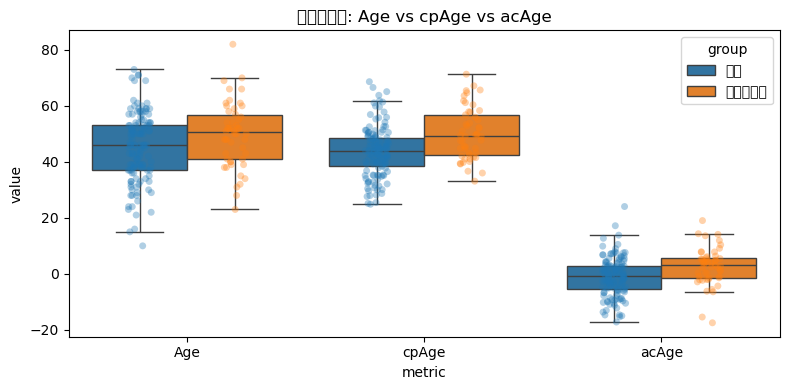

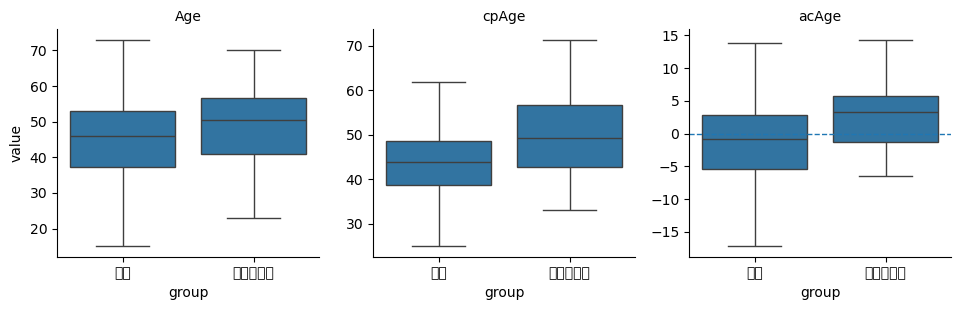

In [330]:
# ========= 4)（可选）图：acAge 里 |δ| 最大且 q<0.05 的前 8 个 =========
    # 修正版：对每个要画的标签 lab
fig, ax = plt.subplots(figsize=(8,4))
sns.boxplot(data=sub_long, x="metric", y="value", hue="group", showfliers=False, ax=ax)
sns.stripplot(data=sub_long, x="metric", y="value", hue="group", dodge=True, alpha=0.35, linewidth=0, ax=ax)

# 合并重复的 legend（box+points 会各加一遍）
handles, labels = ax.get_legend_handles_labels()
seen, h_final, l_final = set(), [], []
for h, l in zip(handles, labels):
    if l not in seen:
        seen.add(l); h_final.append(h); l_final.append(l)
ax.legend(h_final, l_final, title="group", frameon=True, loc="best")

plt.title(f"{lab}: Age vs cpAge vs acAge")
plt.tight_layout(); plt.show()
# 分面：每个 metric 一个面板（不同 y 轴）
g = sns.catplot(data=sub_long, x="group", y="value", col="metric",
                kind="box", sharey=False, showfliers=False, height=3.2, aspect=1)
for ax in g.axes.flat:
    if ax.get_title().endswith("acAge"):
        ax.axhline(0, ls="--", lw=1)
g.set_titles("{col_name}")
plt.tight_layout(); plt.show()


In [390]:
# -*- coding: utf-8 -*-
# === Figure ABC: A/B 对比（样条曲线 + 极端ΔY + ΔR²%），不插补 ===
import os, re, numpy as np, pandas as pd, matplotlib.pyplot as plt
import statsmodels.api as sm
from patsy import dmatrix
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score

# ============ 1) 配置（改这里就好） ============
A_name = "acAge"        # 或 "峰值公斤氧耗"（高=好时，分位改成 P30→P10）
B_name = "BMI"          # 或 "VE/VCO2-slope" / "PBF"
outcomes = ["葡萄糖(空腹)[GLU]","甘油三脂[TG]","尿酸[UA]","总胆红素测定[TBIL]"]
covs_base = ["Age","Sex"]   # 需要时加 Height/Weight
quant_A = (0.70, 0.90)      # A 的“变坏”区间（例如 VO2 用 (0.30,0.10)）
quant_B = (0.70, 0.90)


# 候选连续结局（按优先级扫描 df 中是否存在，取前 3 个做 Panel A；Panel B/C 会把能找到的都做）
Y_CANDIDATES = [
    ("糖化血红蛋白[HbA1c]" , "HbA1c"),
    ("HbA1c"              , "HbA1c"),
    ("葡萄糖(空腹)[GLU]"   , "FBG"),
    ("GLU"                , "FBG"),
    ("糖化白蛋白[GA]"      , "GA"),
    ("GA"                 , "GA"),
    ("空腹胰岛素[FNS]"     , "FNS"),
    ("FNS"                , "FNS"),
    ("C肽指数[CPI]"        , "CPI"),
    ("CPI"                , "CPI"),
]

# 协变量（如果不存在会自动忽略）
COVS_BASE = ["Age", "Sex", "Height", "Weight"]

OUT_DIR = "figs_pub"; os.makedirs(OUT_DIR, exist_ok=True)
FIG_PATH = os.path.join(OUT_DIR, "ABC__{}_vs_{}.png".format(VAR_A, VAR_B))

# ============ 2) 工具函数 ============
def get_present_outcomes(df, candidates, max_n=None):
    seen, out = set(), []
    for col, alias in candidates:
        if col in df.columns and col not in seen:
            out.append((col, alias))
            seen.add(col)
    if max_n is not None:
        out = out[:max_n]
    return out

def numeric_s(df, cols):
    cols = [c for c in cols if c is not None]       # 关键：去掉 None
    d = df.loc[:, cols].copy()
    for c in cols:
        d[c] = pd.to_numeric(d[c], errors="coerce")
    return d

def make_dataset(df, y, x_main, x_other, covs):
    cols = [y, x_main, x_other] + [c for c in covs if c in df.columns]
    d = numeric_s(df, cols).dropna()
    return d

def fit_spline_partial(d, y, x_main, x_other, covs, df_spline=4):
    # y ~ bs(x_main, df=k) + x_other + covs   （部分效应）
    X_bs  = dmatrix(f"bs({x_main}, df={df_spline}, degree=3, include_intercept=False)",
                    d, return_type='dataframe')
    X_lin = d[[x_other] + [c for c in covs if c in d.columns]].copy()
    X     = pd.concat([X_bs.reset_index(drop=True), X_lin.reset_index(drop=True)], axis=1)
    X     = sm.add_constant(X)
    m = sm.OLS(d[y].values, X).fit(cov_type="HC3")
    return m, X.columns.tolist()

def predict_curve(m, x_grid, xname, x_other_name, covs_values, df_spline=4):
    Xs = dmatrix(f"bs(x, df={df_spline}, degree=3, include_intercept=False)",
                 {"x": np.asarray(x_grid)}, return_type='dataframe')
    lin = pd.DataFrame({x_other_name: covs_values[x_other_name]}, index=range(len(x_grid)))
    for c,v in covs_values.items():
        if c in [x_other_name]: continue
        lin[c] = v
    Xnew = pd.concat([Xs.reset_index(drop=True), lin.reset_index(drop=True)], axis=1)
    Xnew = sm.add_constant(Xnew, has_constant='add')
    # 对齐列
    missing_cols = set(m.model.exog_names) - set(Xnew.columns)
    for c in missing_cols:
        Xnew[c] = 0.0
    Xnew = Xnew[m.model.exog_names]
    pr = m.get_prediction(Xnew).summary_frame(alpha=0.05)
    return pr["mean"].values, pr["mean_ci_lower"].values, pr["mean_ci_upper"].values

def extreme_delta(m, q_lo, q_hi, x_main, x_other_name, covs_values, df_spline=4, higher_is_bad=True):
    # 反事实预测：把 x_main 从 q_lo → q_hi（若 higher_is_bad=True 表示往高是“更坏”）
    # 返回“从好到坏”的 ΔY（正值=变坏使 Y 上升）
    # 构造两点
    x_lo, x_hi = q_lo, q_hi
    def pred_at(xval):
        mu,_,_ = predict_curve(m, [xval], x_main, x_other_name, covs_values, df_spline=df_spline)
        return float(mu[0])
    y_lo, y_hi = pred_at(x_lo), pred_at(x_hi)
    return (y_hi - y_lo) if higher_is_bad else (y_lo - y_hi)

from sklearn.model_selection import KFold
import statsmodels.api as sm
from patsy import dmatrix
import numpy as np
import pandas as pd

def numeric_s(df, cols):
    cols = [c for c in cols if c is not None]
    d = df.loc[:, cols].copy()
    for c in cols:
        d[c] = pd.to_numeric(d[c], errors="coerce")
    return d

def cv_r2_spline(df_all, y, include_A, include_B, covs, k=5, df_spline=4):
    # 1) 取需要的列并清 NA
    cols = [y] + covs + ([VAR_A] if include_A else []) + ([VAR_B] if include_B else [])
    d = numeric_s(df_all, cols).dropna()
    if len(d) < 80:
        return np.nan, 0

    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    oof = np.full(len(d), np.nan)

    for tr, va in kf.split(d):
        trd, vad = d.iloc[tr], d.iloc[va]

        # 2) 训练集设计矩阵（每块都 reset_index）
        blocks_tr = []
        if include_A:
            Xa_tr = dmatrix(f"bs({VAR_A}, df={df_spline}, degree=3, include_intercept=False)",
                            trd, return_type='dataframe').reset_index(drop=True)
            blocks_tr.append(Xa_tr)
        if include_B:
            Xb_tr = dmatrix(f"bs({VAR_B}, df={df_spline}, degree=3, include_intercept=False)",
                            trd, return_type='dataframe').reset_index(drop=True)
            blocks_tr.append(Xb_tr)
        lin_tr = sm.add_constant(trd[covs], has_constant='add').reset_index(drop=True)
        Xtr = pd.concat(blocks_tr + [lin_tr], axis=1)

        ytr = trd[y].values
        mod = sm.OLS(ytr, Xtr).fit()

        # 3) 验证集设计矩阵（同样 reset，并按训练列名对齐）
        blocks_va = []
        if include_A:
            Xa_va = dmatrix(f"bs({VAR_A}, df={df_spline}, degree=3, include_intercept=False)",
                            vad, return_type='dataframe').reset_index(drop=True)
            blocks_va.append(Xa_va)
        if include_B:
            Xb_va = dmatrix(f"bs({VAR_B}, df={df_spline}, degree=3, include_intercept=False)",
                            vad, return_type='dataframe').reset_index(drop=True)
            blocks_va.append(Xb_va)
        lin_va = sm.add_constant(vad[covs], has_constant='add').reset_index(drop=True)
        Xva = pd.concat(blocks_va + [lin_va], axis=1)
        Xva = Xva.reindex(columns=Xtr.columns, fill_value=0)

        # 4) 预测写回同一 OOF 索引
        oof[va] = mod.predict(Xva)

    # 5) 计算 OOF R²
    mask = ~np.isnan(oof)
    yv, pv = d[y].values[mask], oof[mask]
    r2 = 1 - ((yv - pv)**2).sum() / ((yv - yv.mean())**2).sum()
    return float(r2), int(len(d))


# ============ 3) 选择结局 & 协变量 ============
present = get_present_outcomes(df, Y_CANDIDATES)          # 全部可用
present_A = present[:3] if len(present)>=3 else present   # 面板A最多取3行
if len(present_A)==0:
    raise RuntimeError("未找到任何候选结局，请检查列名，比如 GLU/GA/HbA1c/FNS/CPI 等。")

covs = [c for c in COVS_BASE if c in df.columns]

# ============ 4) Panel A：样条曲线 ============
n_rows = len(present_A)
fig = plt.figure(figsize=(10, 3.0*n_rows + 2.0))
gs  = fig.add_gridspec(n_rows, 2, left=0.07, right=0.60, wspace=0.25, hspace=0.35)

curves_info = []   # 收集用于 Panel B 的分位与模型
for i, (ycol, yal) in enumerate(present_A):
    # A 的部分效应
    dA = make_dataset(df, ycol, VAR_A, VAR_B, covs)
    if len(dA) < 80: continue
    mA, colsA = fit_spline_partial(dA, ycol, VAR_A, VAR_B, covs, df_spline=4)
    axA = fig.add_subplot(gs[i,0])
    xa = np.linspace(dA[VAR_A].quantile(0.02), dA[VAR_A].quantile(0.98), 120)
    cov_fix = {VAR_B: dA[VAR_B].median()}
    for c in covs: cov_fix[c] = dA[c].median()
    mu, lo, hi = predict_curve(mA, xa, VAR_A, VAR_B, cov_fix, df_spline=4)
    axA.plot(xa, mu); axA.fill_between(xa, lo, hi, alpha=0.2, linewidth=0)
    axA.set_title(f"{yal} ~ {VAR_A}")
    axA.set_xlabel(VAR_A); axA.set_ylabel(yal)
    # B 的部分效应
    dB = make_dataset(df, ycol, VAR_B, VAR_A, covs)
    mB, colsB = fit_spline_partial(dB, ycol, VAR_B, VAR_A, covs, df_spline=4)
    axB = fig.add_subplot(gs[i,1])
    xb = np.linspace(dB[VAR_B].quantile(0.02), dB[VAR_B].quantile(0.98), 120)
    cov_fix2 = {VAR_A: dB[VAR_A].median()}
    for c in covs: cov_fix2[c] = dB[c].median()
    mu2, lo2, hi2 = predict_curve(mB, xb, VAR_B, VAR_A, cov_fix2, df_spline=4)
    axB.plot(xb, mu2); axB.fill_between(xb, lo2, hi2, alpha=0.2, linewidth=0)
    axB.set_title(f"{yal} ~ {VAR_B}")
    axB.set_xlabel(VAR_B); axB.set_ylabel("")
    # 存储做 Panel B/C
    curves_info.append({
        "y": ycol, "label": yal,
        "mA": mA, "mB": mB,
        "A_q70": dA[VAR_A].quantile(0.70), "A_q90": dA[VAR_A].quantile(0.90),
        "B_q70": dB[VAR_B].quantile(0.70), "B_q90": dB[VAR_B].quantile(0.90),
        "cov_fix_A": cov_fix, "cov_fix_B": cov_fix2,
        "nA": len(dA), "nB": len(dB)
    })

# ============ 5) Panel B：极端变化幅度 ΔY ============
# 右侧 2 个轴（上：Panel B，下：Panel C）
gs_right = fig.add_gridspec(2, 1, left=0.68, right=0.98, hspace=0.50)

# 先根据可用的 y 收集 ΔY
rows_B = []
for info in curves_info:
    ΔA = extreme_delta(info["mA"], info["A_q70"], info["A_q90"], VAR_A, VAR_B, info["cov_fix_A"],
                       df_spline=4, higher_is_bad=A_HIGH_IS_BAD)
    ΔB = extreme_delta(info["mB"], info["B_q70"], info["B_q90"], VAR_B, VAR_A, info["cov_fix_B"],
                       df_spline=4, higher_is_bad=B_HIGH_IS_BAD)
    rows_B.append([info["label"], ΔA, ΔB])
B_tbl = pd.DataFrame(rows_B, columns=["Y","ΔY_A","ΔY_B"]).set_index("Y")
B_tbl = B_tbl.loc[::-1]  # 颠倒顺序从上到下显示

axBpanel = fig.add_subplot(gs_right[0,0])
ypos = np.arange(len(B_tbl))
axBpanel.hlines(ypos, 0, B_tbl["ΔY_A"].abs(), color="C0", lw=3)
axBpanel.hlines(ypos, 0, -B_tbl["ΔY_B"].abs(), color="C3", lw=3)
axBpanel.plot(B_tbl["ΔY_A"].abs(), ypos, "o", color="C0", label=f"{VAR_A}（P70→P90）")
axBpanel.plot(-B_tbl["ΔY_B"].abs(), ypos, "o", color="C3", label=f"{VAR_B}（P70→P90）")
axBpanel.set_yticks(ypos); axBpanel.set_yticklabels(B_tbl.index.tolist())
m = np.nanmax(B_tbl.abs().values) if len(B_tbl) else 1.0
axBpanel.set_xlim(-m*1.2, m*1.2)
axBpanel.set_xlabel("Absolute ΔY（per extreme change）")
axBpanel.set_title("B  极端变化幅度（|ΔY|）")
axBpanel.axvline(0, ls="--", lw=1, c="k")
axBpanel.legend(loc="lower right", frameon=False)

# ============ 6) Panel C：增量解释度 ΔR²%（5折CV） ============
rows_C = []
all_present = get_present_outcomes(df, Y_CANDIDATES, max_n=None)
for ycol, yal in all_present:
    # Base: covs + bs(B) ; Full: + bs(A)  → ΔR²_A|B
    R2_B, n1   = cv_r2_spline(df, ycol, include_A=False, include_B=True , covs=covs, k=5, df_spline=4)
    R2_BA, n1b = cv_r2_spline(df, ycol, include_A=True , include_B=True , covs=covs, k=5, df_spline=4)
    # Base: covs + bs(A) ; Full: + bs(B)  → ΔR²_B|A
    R2_A, n2   = cv_r2_spline(df, ycol, include_A=True , include_B=False, covs=covs, k=5, df_spline=4)
    R2_AB, n2b = cv_r2_spline(df, ycol, include_A=True , include_B=True , covs=covs, k=5, df_spline=4)
    rows_C.append([yal, 100*(R2_BA-R2_B), 100*(R2_AB-R2_A)])
C_tbl = pd.DataFrame(rows_C, columns=["Y","ΔR2_A|B_%","ΔR2_B|A_%"]).set_index("Y")
C_tbl = C_tbl.loc[B_tbl.index] if len(B_tbl) else C_tbl  # 与 Panel B 对齐顺序

axCpanel = fig.add_subplot(gs_right[1,0])
ypos = np.arange(len(C_tbl))
axCpanel.barh(ypos-0.20, C_tbl["ΔR2_A|B_%"].values, height=0.38, color="C0", label=f"{VAR_A} | {VAR_B}")
axCpanel.barh(ypos+0.20, C_tbl["ΔR2_B|A_%"].values, height=0.38, color="C3", label=f"{VAR_B} | {VAR_A}")
axCpanel.set_yticks(ypos); axCpanel.set_yticklabels(C_tbl.index.tolist())
axCpanel.set_xlabel("Incremental variance explained (ΔR², %)  —  5-fold CV")
axCpanel.set_title("C  增量解释度")
axCpanel.legend(loc="lower right", frameon=False)

# ============ 7) 总标题 & 保存 ============
fig.suptitle(f"A/B 对比：{VAR_A} vs {VAR_B}", y=0.99, fontsize=14)
plt.savefig(FIG_PATH, dpi=300, bbox_inches="tight")
plt.close()
print(f"[Saved] {FIG_PATH}")


[Saved] figs_pub\ABC__acAge_vs_BMI.png


In [324]:
import pandas as pd, numpy as np

eff = pd.read_csv("stage3_effects_cliffs_FDR.csv")

# 1) 各指标Top10（看 acAge 是否靠前）
for m in ["acAge","cpAge","Age"]:
    print(f"\n=== Top10 by |δ| for {m} ===")
    print(eff.query("metric == @m").sort_values("abs_delta", ascending=False)
              .head(10)[["label","delta","ci_lo","ci_hi","p","q","abs_delta"]])

# 2) acAge 是否“赢过” Age：Δ|δ| = |δ_acAge| - |δ_Age|
w = (eff.pivot_table(index="label", columns="metric", values=["abs_delta","q"])
       .reset_index())
# 展开列层级
w.columns = ["label"] + ["_".join(c).strip() for c in w.columns.tolist()[1:]]
w["Delta_abs"] = w["abs_delta_acAge"] - w["abs_delta_Age"]
w["ac_win"] = (w["Delta_abs"] > 0).astype(int)
w["sig_ac"] = (w["q_acAge"] < 0.05).astype(int)
w["sig_age"] = (w["q_Age"]  < 0.05).astype(int)

print("\n=== 摘要 ===")
print("acAge |δ| > Age 的标签数：", int(w["ac_win"].sum()), "/", len(w))
print("acAge 显著 (q<0.05) 的标签数：", int(w["sig_ac"].sum()))
print("Age  显著 (q<0.05) 的标签数：",  int(w["sig_age"].sum()))

# 3) 按“acAge相对Age提升最多”的Top10
print("\n=== Δ|δ| Top10 (acAge - Age) ===")
print(w.sort_values("Delta_abs", ascending=False)
        .head(10)[["label","abs_delta_acAge","abs_delta_Age","q_acAge","q_Age","Delta_abs"]])



=== Top10 by |δ| for acAge ===
       label     delta     ci_lo     ci_hi         p         q  abs_delta
12     高尿酸血症  0.345672  0.156694  0.513739  0.000316  0.000506   0.345672
13      支架术后  0.339801  0.199229  0.468557  0.000016  0.000034   0.339801
14       高血压  0.246401  0.136573  0.355151  0.000015  0.000032   0.246401
15       冠心病  0.211869  0.097647  0.316398  0.000340  0.000526   0.211869
16  代谢性疾病_汇总  0.205025  0.100169  0.310774  0.000204  0.000350   0.205025
17      高脂血症  0.190947  0.060425  0.318156  0.003649  0.005307   0.190947
18       糖尿病  0.190011  0.044611  0.326927  0.012000  0.015999   0.190011
19  心血管疾病_汇总  0.143209  0.045636  0.247864  0.010509  0.014412   0.143209
20    非心血管疾病  0.092718 -0.137528  0.317967  0.411133  0.481326   0.092718
21   非心血管_汇总  0.087065 -0.148953  0.304312  0.424262  0.484871   0.087065

=== Top10 by |δ| for cpAge ===
       label     delta     ci_lo     ci_hi             p             q  \
36      支架术后  0.629519  0.504971  0.736497  1.44

In [332]:
# ================= 阶段4 =================
# ================= 配置 =================
RANDOM_STATE   = 42
TARGET         = "acAge"        # 可切到 "cpAge"
COVS           = ["Age","Sex","Height","Weight"]  # 协变量；若你的 acAge 已用 Age+Sex 残差，也可删成 []
Q_LOW, Q_HIGH  = 0.20, 0.80     # 极端分位阈值
N_BOOT         = 1000           # 极端分析 δ 的 CI bootstrap 次数
K_FOLDS        = 5              # ΔR² 的 CV 折数
RESTRICT_TO_CONTROL = False     # 如需只在“无疾病”或宽松对照中分析，可改成 True 并设置 mask

import numpy as np, pandas as pd, time, re, os
from scipy.stats import pearsonr, spearmanr, mannwhitneyu
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.random.seed(RANDOM_STATE)
os.makedirs("stage4_blood", exist_ok=True)

# ---------- 0) 准备 cpAge/acAge ----------
if "cpAge" not in df.columns or "acAge" not in df.columns:
    tmp = pd.read_csv("stage2_runs/cpAge_acAge_oof.csv")
    for col in ["cpAge","acAge"]:
        if col in tmp.columns: df[col] = tmp[col].values
    print("[Info] 已从 stage2_runs/cpAge_acAge_oof.csv 读入 cpAge/acAge")

# Sex 数值化（如已是 0/1 会保持）
if df["Sex"].dtype == object:
    df["Sex"] = df["Sex"].map({"M":1,"F":0,"男":1,"女":0}).astype(float)

# 如需只在“对照”中分析，这里自定义 mask（举例：优先用你的“无疾病”列；否则用“*_汇总==0”的宽松口径）
if RESTRICT_TO_CONTROL:
    if "无疾病" in df.columns:
        ctrl_mask = df["无疾病"] == 1
    else:
        summary_cols = [c for c in df.columns if c.endswith("汇总")]
        ctrl_mask = (df[summary_cols].fillna(0).sum(axis=1) == 0) if summary_cols else pd.Series(True, index=df.index)
else:
    ctrl_mask = pd.Series(True, index=df.index)

# ---------- 小工具 ----------
def cliffs_delta_from_U(x, y):
    x = np.asarray(x, float); y = np.asarray(y, float)
    x = x[~np.isnan(x)]; y = y[~np.isnan(y)]
    m, n = len(x), len(y)
    if m == 0 or n == 0: return np.nan
    U = mannwhitneyu(x, y, alternative="two-sided", method="auto").statistic
    return (2*U)/(m*n) - 1.0

def cliffs_boot_ci(x, y, B=1000, seed=42):
    rng = np.random.default_rng(seed)
    x = np.asarray(x, float); y = np.asarray(y, float)
    x = x[~np.isnan(x)]; y = y[~np.isnan(y)]
    if len(x)==0 or len(y)==0: return (np.nan, np.nan)
    stats = []
    for _ in range(B):
        xb = rng.choice(x, size=len(x), replace=True)
        yb = rng.choice(y, size=len(y), replace=True)
        stats.append(cliffs_delta_from_U(xb, yb))
    lo, hi = np.percentile(stats, [2.5, 97.5])
    return float(lo), float(hi)

def fdr_bh(pvals):
    p = np.array(pvals, float)
    m = np.sum(~np.isnan(p))
    order = np.argsort(p)
    ranks = np.empty_like(order); ranks[order] = np.arange(1, len(p)+1)
    q = p * m / ranks
    q[order] = np.minimum.accumulate(q[order][::-1])[::-1]
    return np.minimum(q, 1.0)

# ---------- 1) 相关分析（pairwise 可用样本） ----------
corr_rows = []
t0 = time.time()
for v in blood_vars:
    sub = df.loc[ctrl_mask, [TARGET, v]].apply(pd.to_numeric, errors="coerce").dropna()
    if len(sub) < 30: 
        continue
    r_p = pearsonr(sub[TARGET], sub[v])
    r_s = spearmanr(sub[TARGET], sub[v])
    corr_rows.append([v, len(sub), r_p[0], r_p[1], r_s.correlation, r_s.pvalue])
corr_df = pd.DataFrame(corr_rows, columns=["marker","n","pearson_r","pearson_p","spearman_rho","spearman_p"])
corr_df["q_pearson"]  = fdr_bh(corr_df["pearson_p"])
corr_df["q_spearman"] = fdr_bh(corr_df["spearman_p"])
corr_df.sort_values("pearson_p", inplace=True)
corr_df.to_csv("stage4_blood/01_correlations.csv", index=False)
print(f"[1/4] 相关完成：{len(corr_df)} 项 | 用时 {time.time()-t0:.1f}s")

# ---------- 2) 多元线性回归（robust SE，pairwise 子样本） ----------
try:
    import statsmodels.api as sm
    have_sm = True
except Exception as e:
    have_sm = False
    print("[Warn] 未安装 statsmodels，回归部分将跳过。 pip install statsmodels 即可。")

reg_rows = []
if have_sm:
    t1 = time.time()
    for v in blood_vars:
        cols = [TARGET, v] + COVS
        sub = df.loc[ctrl_mask, cols].apply(pd.to_numeric, errors="coerce").dropna()
        if len(sub) < 50: 
            continue
        y = sub[TARGET].values
        X = sub[[v] + COVS].copy()
        # 标准化自变量（便于比较效应大小）；不改 y
        for c in [v] + COVS:
            if c == "Sex":  # 二值不标准化
                continue
            mu, sd = X[c].mean(), X[c].std(ddof=0)
            if sd > 0: X[c] = (X[c] - mu) / sd

        X = sm.add_constant(X)
        model = sm.OLS(y, X, hasconst=True)
        res   = model.fit(cov_type="HC3")  # robust SE
        if v in res.params:
            beta = res.params[v]; se = res.bse[v]; p = res.pvalues[v]
            ci_lo, ci_hi = beta - 1.96*se, beta + 1.96*se
        else:
            beta = se = p = ci_lo = ci_hi = np.nan
        reg_rows.append([v, len(sub), beta, se, ci_lo, ci_hi, p, res.rsquared, res.rsquared_adj])
    reg_df = pd.DataFrame(reg_rows, columns=["marker","n","beta_std","se","ci_lo","ci_hi","p","R2","R2_adj"])
    reg_df["q"] = fdr_bh(reg_df["p"])
    reg_df.sort_values("p", inplace=True)
    reg_df.to_csv("stage4_blood/02_regression_assoc.csv", index=False)
    print(f"[2/4] 回归完成：{len(reg_df)} 项 | 用时 {time.time()-t1:.1f}s")

# ---------- 3) 极端分位差（高20% vs 低20%，Cliff’s δ + 均值差） ----------
ext_rows = []
t2 = time.time()
for v in blood_vars:
    sub = df.loc[ctrl_mask, [TARGET, v]].apply(pd.to_numeric, errors="coerce").dropna()
    if len(sub) < 80:
        continue
    lo = sub[v].quantile(Q_LOW)
    hi = sub[v].quantile(Q_HIGH)
    g_low  = sub.loc[sub[v] <= lo, TARGET].values
    g_high = sub.loc[sub[v] >= hi, TARGET].values
    if len(g_low) < 20 or len(g_high) < 20:
        continue
    delta = cliffs_delta_from_U(g_high, g_low)  # 高 vs 低
    ci_lo, ci_hi = cliffs_boot_ci(g_high, g_low, B=N_BOOT, seed=RANDOM_STATE)
    # MWU p 值
    p = mannwhitneyu(g_high, g_low, alternative="two-sided", method="auto").pvalue
    diff_mean = float(np.mean(g_high) - np.mean(g_low))
    ext_rows.append([v, len(g_low)+len(g_high), diff_mean, delta, ci_lo, ci_hi, p,
                     float(np.mean(g_high)), float(np.mean(g_low))])
ext_df = pd.DataFrame(ext_rows, columns=["marker","n_used","mean_diff(high-low)","cliffs_delta","ci_lo","ci_hi","p","mean_high","mean_low"])
ext_df["q"] = fdr_bh(ext_df["p"])
ext_df.sort_values("p", inplace=True)
ext_df.to_csv("stage4_blood/03_extreme_contrast.csv", index=False)
print(f"[3/4] 极端分位差完成：{len(ext_df)} 项 | 用时 {time.time()-t2:.1f}s")

# ---------- 4) 增量解释度 ΔR²（5 折 CV；Base: 协变量 → + 单指标） ----------
dR2_rows = []
t3 = time.time()
for v in blood_vars:
    cols = [TARGET] + COVS + [v]
    sub = df.loc[ctrl_mask, cols].apply(pd.to_numeric, errors="coerce").dropna()
    if len(sub) < 80:
        continue
    y = sub[TARGET].values
    Xb = sub[COVS].values
    Xf = sub[COVS + [v]].values

    # 5折 CV R²
    kf = KFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)
    pred_b, pred_f = np.zeros_like(y, dtype=float), np.zeros_like(y, dtype=float)
    for tr, va in kf.split(Xb):
        # 基线
        lr_b = LinearRegression()
        lr_b.fit(Xb[tr], y[tr]); pred_b[va] = lr_b.predict(Xb[va])
        # + marker
        lr_f = LinearRegression()
        lr_f.fit(Xf[tr], y[tr]); pred_f[va] = lr_f.predict(Xf[va])
    r2_b = r2_score(y, pred_b)
    r2_f = r2_score(y, pred_f)
    dR2  = r2_f - r2_b
    dR2_rows.append([v, len(sub), r2_b, r2_f, dR2])
dR2_df = pd.DataFrame(dR2_rows, columns=["marker","n","R2_base","R2_full","delta_R2"])
dR2_df.sort_values("delta_R2", ascending=False, inplace=True)
dR2_df.to_csv("stage4_blood/04_deltaR2_cv.csv", index=False)
print(f"[4/4] ΔR² 完成：{len(dR2_df)} 项 | 用时 {time.time()-t3:.1f}s")

print("\n已输出：")
print(" - stage4_blood/01_correlations.csv")
print(" - stage4_blood/02_regression_assoc.csv")
print(" - stage4_blood/03_extreme_contrast.csv")
print(" - stage4_blood/04_deltaR2_cv.csv")


[1/4] 相关完成：42 项 | 用时 0.5s
[2/4] 回归完成：42 项 | 用时 1.1s
[3/4] 极端分位差完成：42 项 | 用时 132.8s
[4/4] ΔR² 完成：42 项 | 用时 1.3s

已输出：
 - stage4_blood/01_correlations.csv
 - stage4_blood/02_regression_assoc.csv
 - stage4_blood/03_extreme_contrast.csv
 - stage4_blood/04_deltaR2_cv.csv


In [334]:
import pandas as pd
import numpy as np

corr_df = pd.read_csv("stage4_blood/01_correlations.csv")
reg_df  = pd.read_csv("stage4_blood/02_regression_assoc.csv")
ext_df  = pd.read_csv("stage4_blood/03_extreme_contrast.csv")
dR2_df  = pd.read_csv("stage4_blood/04_deltaR2_cv.csv")

# 统一列名简写
corr_df.rename(columns={"marker":"marker","spearman_rho":"rho","q_spearman":"q_rho"}, inplace=True)
reg_df.rename(columns={"marker":"marker","beta_std":"beta","q":"q_beta"}, inplace=True)
ext_df.rename(columns={"marker":"marker","cliffs_delta":"delta","q":"q_delta"}, inplace=True)

# 合并
tab = (corr_df[["marker","n","rho","q_rho"]]
       .merge(reg_df[["marker","n","beta","ci_lo","ci_hi","q_beta","R2","R2_adj"]], on="marker", how="outer")
       .merge(ext_df[["marker","n_used","delta","ci_lo","ci_hi","q_delta","mean_high","mean_low"]],
              on="marker", how="outer", suffixes=("_reg","_ext"))
       .merge(dR2_df, on="marker", how="outer"))

# 一致性：符号是否一致（rho、beta、delta 同号）
def sgn(x): 
    return np.sign(x) if pd.notnull(x) else np.nan
tab["signs"] = tab.apply(lambda r: [sgn(r["rho"]), sgn(r["beta"]), sgn(r["delta"])], axis=1)
tab["n_sign"] = tab["signs"].apply(lambda L: np.sum([1 for v in L if v==1 or v==-1]))
tab["n_consistent"] = tab["signs"].apply(lambda L: 
    1 if len({v for v in L if not np.isnan(v)})==1 else 0)

# 显著性：三法 q 值中显著的个数
tab["k_sig"] = ((tab["q_rho"]<0.05).fillna(False).astype(int) +
                (tab["q_beta"]<0.05).fillna(False).astype(int) +
                (tab["q_delta"]<0.05).fillna(False).astype(int))

# 排序：优先 ΔR²，其次回归q，其次极端q
tab.sort_values(["delta_R2","q_beta","q_delta"], ascending=[False, True, True], inplace=True)

# 只保留：方向一致&至少两法显著
stable = tab[(tab["n_consistent"]==1) & (tab["k_sig"]>=2)].copy()

cols_show = ["marker","n","rho","q_rho","beta","q_beta","delta","q_delta",
             "R2_adj","delta_R2"]
print("=== 稳健 Top（方向一致 & ≥2法显著），按 ΔR² 排 ===")
print(stable[cols_show].head(20))

# 导出
stable.to_csv("stage4_blood/05_stable_markers.csv", index=False)
print("保存：stage4_blood/05_stable_markers.csv")


=== 稳健 Top（方向一致 & ≥2法显著），按 ΔR² 排 ===
             marker     n       rho     q_rho      beta    q_beta     delta  \
12    嗜酸性粒细胞数(EOS#)  1139  0.126403  0.000790  0.905578  0.001115  0.199105   
13      嗜酸粒比率(EOS%)  1139  0.099952  0.007665  0.673808  0.019907  0.118253   
24     总胆红素测定[TBIL]   722 -0.104276  0.026441 -0.600418  0.145341 -0.193765   
5   中性粒细胞绝对值(GRAN#)  1159  0.110073  0.003644  0.625074  0.048468  0.200163   
18    平均血红蛋白含量(MCH)  1159 -0.076565  0.038297 -0.293041  0.361060 -0.171029   
38       血小板容积(PCT)  1152  0.102132  0.007238  0.328675  0.361060  0.177547   

     q_delta    R2_adj  delta_R2  
12  0.003963  0.058273  0.010576  
13  0.114954  0.051234  0.007708  
24  0.035933  0.039598  0.006477  
5   0.003963  0.050080  0.005836  
18  0.013575  0.043765  0.001127  
38  0.007427  0.043982 -0.001071  
保存：stage4_blood/05_stable_markers.csv


Top 16（按 |相关| 排序）预览：
               marker     n      stat         p
0       嗜酸性粒细胞数(EOS#)  1139  0.126403  0.000019
1     中性粒细胞绝对值(GRAN#)  1159  0.110073  0.000174
2      α-羟丁酸脱氢酶[HBDH]   625  0.108665  0.006543
3        总胆红素测定[TBIL]   722 -0.104276  0.005036
4          血小板容积(PCT)  1152  0.102132  0.000517
5         嗜酸粒比率(EOS%)  1139  0.099952  0.000730
6         单核细胞数(MON#)  1159  0.095104  0.001189
7      淋巴细胞绝对值(LYMP#)  1159  0.090499  0.002043
8          乳酸脱氢酶[LDH]   630  0.090113  0.023701
9              尿酸[UA]   828  0.087752  0.011533
10           球蛋白[GLB]   788  0.084302  0.017936
11       平均红细胞体积(MCV)  1159 -0.082507  0.004944
12      幼稚粒细胞绝对值(IG#)  1027  0.077792  0.012641
13      平均血红蛋白含量(MCH)  1159 -0.076565  0.009118
14  RBC分布宽度CV(RDW-CV)  1159  0.072849  0.013112
15     平均血红蛋白浓度(MCHC)  1159 -0.071613  0.014748


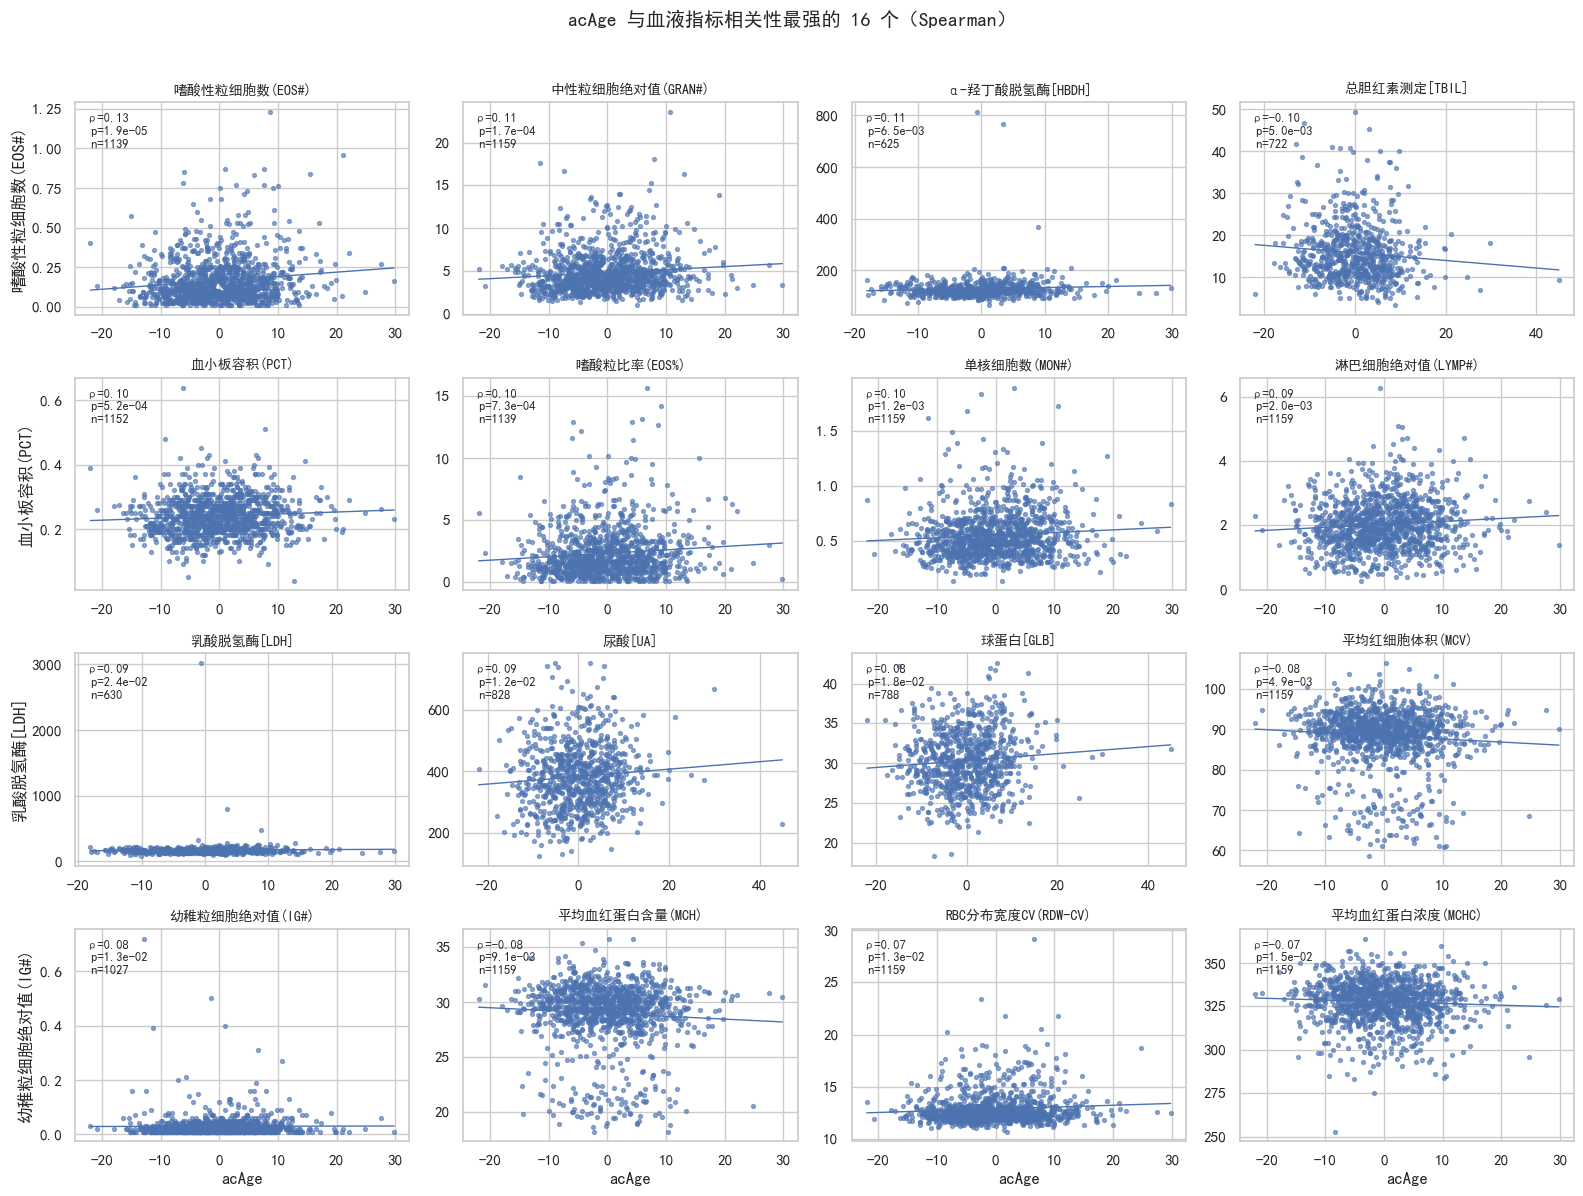

[Saved] acAge_vs_blood_top16_grid.png


In [364]:
# === acAge vs. 血液指标：Top16 相关性 4x4 图 ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# 配置
METHOD = "spearman"   # "spearman" 或 "pearson"
TOPK   = 16
MIN_N  = 30           # 至少配对样本量

# 确保有 acAge（若不在 df，尝试从文件读取）
if "acAge" not in df.columns:
    try:
        tmp = pd.read_csv("stage2_runs/cpAge_acAge_oof.csv")
        if "acAge" in tmp.columns:
            df["acAge"] = pd.to_numeric(tmp["acAge"], errors="coerce")
            print("[Info] 已从文件载入 acAge")
    except Exception as e:
        print("[Warn] 无法载入 acAge：", e)

if "acAge" not in df.columns:
    raise RuntimeError("缺少 acAge 列，无法作图。")

# 统一为数值
df_num = df.copy()
df_num["acAge"] = pd.to_numeric(df_num["acAge"], errors="coerce")
for v in blood_vars:
    if v in df_num.columns:
        df_num[v] = pd.to_numeric(df_num[v], errors="coerce")

# 计算相关
rows = []
for v in blood_vars:
    if v not in df_num.columns: 
        continue
    pair = df_num[["acAge", v]].dropna()
    n = len(pair)
    if n < MIN_N:
        continue
    if METHOD == "pearson":
        from scipy.stats import pearsonr
        r, p = pearsonr(pair["acAge"], pair[v])
        stat_name = "r"
    else:
        r, p = spearmanr(pair["acAge"], pair[v])
        stat_name = "ρ"
    rows.append({"marker": v, "n": n, "stat": r, "p": p, "abs_stat": abs(r)})

res = pd.DataFrame(rows).sort_values("abs_stat", ascending=False)
if res.empty:
    raise RuntimeError("血液指标与 acAge 的可用配对样本不足，或 blood_vars 不正确。")

top = res.head(TOPK).reset_index(drop=True)
print("Top 16（按 |相关| 排序）预览：")
print(top[["marker","n","stat","p"]])

# 4x4 网格作图
K = min(TOPK, len(top))
nrow, ncol = 4, 4
fig, axes = plt.subplots(nrow, ncol, figsize=(16, 12))
axes = axes.flatten()

for i in range(nrow*ncol):
    ax = axes[i]
    if i >= K:
        ax.axis("off")
        continue
    v = top.loc[i, "marker"]
    pair = df_num[["acAge", v]].dropna()
    x = pair["acAge"].values
    y = pair[v].values

    # 散点
    ax.scatter(x, y, s=8, alpha=0.6)

    # 简单线性拟合（仅用于视觉引导）
    try:
        if len(x) >= 2:
            coef = np.polyfit(x, y, 1)
            xx = np.linspace(np.nanmin(x), np.nanmax(x), 100)
            yy = np.polyval(coef, xx)
            ax.plot(xx, yy, linewidth=1)
    except Exception:
        pass

    # 标注：ρ/p/n
    stat = top.loc[i, "stat"]
    pval = top.loc[i, "p"]
    n    = top.loc[i, "n"]
    ax.text(0.03, 0.95, f"{stat_name}={stat:.2f}\n p={pval:.1e}\n n={n}",
            transform=ax.transAxes, va="top", ha="left", fontsize=9)

    ax.set_title(v, fontsize=10)
    if i // ncol == nrow-1:
        ax.set_xlabel("acAge")
    if i % ncol == 0:
        ax.set_ylabel(v)

plt.suptitle(f"acAge 与血液指标相关性最强的 {K} 个（{METHOD.title()}）", y=0.995, fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.98])
out_path = "acAge_vs_blood_top16_grid.png"
plt.savefig(out_path, dpi=300, bbox_inches="tight")
plt.show()
print(f"[Saved] {out_path}")


In [378]:
# === C. NRI / IDI / ΔBrier 条形 + 95% CI（多标签） ===
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, brier_score_loss

OUT="figs_pub"; os.makedirs(OUT, exist_ok=True)

def oof_preds(X, y, k=5, seed=42):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    oof = np.zeros(len(y))
    for tr, va in skf.split(X, y):
        pipe = Pipeline([("sc", StandardScaler()), ("lr", LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear"))])
        pipe.fit(X.iloc[tr], y.iloc[tr]); oof[va] = pipe.predict_proba(X.iloc[va])[:,1]
    return oof

def idi_nri(y, p_b, p_f):
    y = np.asarray(y).astype(int); pos, neg = y==1, y==0
    IDI = (p_f[pos].mean()-p_f[neg].mean()) - (p_b[pos].mean()-p_b[neg].mean())
    up_pos=(p_f[pos]>p_b[pos]).mean(); down_pos=(p_f[pos]<p_b[pos]).mean()
    up_neg=(p_f[neg]>p_b[neg]).mean(); down_neg=(p_f[neg]<p_b[neg]).mean()
    NRI = (up_pos-down_pos) + (down_neg-up_neg)
    return float(IDI), float(NRI)

def bootstrap(y, p_b, p_f, B=2000, seed=42):
    rng=np.random.default_rng(seed); n=len(y)
    dAUC=[]; IDI=[]; NRI=[]; dB=[]
    for _ in range(B):
        idx=rng.integers(0,n,n); yy=y[idx]; pb=p_b[idx]; pf=p_f[idx]
        dAUC.append(roc_auc_score(yy,pf)-roc_auc_score(yy,pb))
        idi,nri=idi_nri(yy,pb,pf); IDI.append(idi); NRI.append(nri)
        dB.append(brier_score_loss(yy,pb)-brier_score_loss(yy,pf))
    def ci(a): a=np.array(a); return float(a.mean()), float(np.percentile(a,2.5)), float(np.percentile(a,97.5))
    return {"ΔAUC":ci(dAUC),"IDI":ci(IDI),"NRI":ci(NRI),"ΔBrier":ci(dB)}

labels = ["高尿酸血症","高血压","高脂血症"]  # 你想比较的标签
rows=[]
for lab in labels:
    cols = ["Age","Sex","Height","Weight","acAge_z", lab]
    sub = df[cols].apply(pd.to_numeric, errors="coerce").dropna()
    if sub.empty: continue
    y = sub[lab].astype(int)
    Xb = sub[["Age","Sex","Height","Weight"]]; Xf = sub[["Age","Sex","Height","Weight","acAge_z"]]
    p_b = oof_preds(Xb, y); p_f = oof_preds(Xf, y)
    stats = bootstrap(y.values, p_b, p_f, B=1000, seed=42)
    rows.append({"label":lab, **{k:v[0] for k,v in stats.items()},
                 **{k+"_lo":v[1] for k,v in stats.items()}, **{k+"_hi":v[2] for k,v in stats.items()}})
res = pd.DataFrame(rows); res.to_csv("stage5_strengthen/S5_nri_idi_brier.csv", index=False)
print(res)

# 画条形 + 误差线
for metric in ["ΔAUC","IDI","NRI","ΔBrier"]:
    plt.figure(figsize=(6,3.6))
    x=np.arange(len(res)); y=res[metric].values
    lo=res[metric+"_lo"].values; hi=res[metric+"_hi"].values
    err=np.vstack([y-lo, hi-y])
    plt.bar(x,y); plt.errorbar(x,y,yerr=err, fmt="none", lw=1.5, capsize=3, color="k")
    plt.xticks(x, res["label"].tolist(), rotation=0); plt.ylabel(metric); plt.axhline(0, ls="--", c="k", lw=1)
    plt.title(f"{metric}（95% CI，5折CV+bootstrap）")
    plt.tight_layout(); plt.savefig(f"{OUT}/S5_{metric}_bars.png", dpi=300); plt.close()
print("Saved S5_*_bars to figs_pub/")


   label      ΔAUC       IDI       NRI    ΔBrier   ΔAUC_lo    IDI_lo  \
0  高尿酸血症  0.022209  0.031197  0.443587  0.006256 -0.010254  0.002027   
1    高血压  0.007201  0.013192  0.286126  0.002248 -0.000285  0.007308   
2   高脂血症  0.001398  0.004630  0.220257  0.000839 -0.007679 -0.001919   

     NRI_lo  ΔBrier_lo   ΔAUC_hi    IDI_hi    NRI_hi  ΔBrier_hi  
0  0.191083   0.003018  0.053946  0.059241  0.714305   0.009554  
1  0.191421   0.000035  0.015153  0.019271  0.389881   0.004488  
2  0.077621  -0.000740  0.010729  0.011269  0.366885   0.002429  
Saved S5_*_bars to figs_pub/


In [368]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr, gaussian_kde
from PIL import Image

# ===== 配置 =====
OUT_DIR = "figs_pub"
GRID_NAME = "acAge_top16_blood_grid"
SINGLE_FIG_SIZE = (3.0, 3.0)   # 每张小图尺寸（英寸）
POINT_SIZE = 8
ALPHA = 0.85
Q_LOW, Q_HIGH = 0.005, 0.995   # 去极值：0.5%~99.5% 分位
MAX_TOP = 16                   # 取前16个
CMAP = "Reds"                  # 密度越高越红

os.makedirs(OUT_DIR, exist_ok=True)

def sig_stars(p):
    return "***" if p < 1e-3 else "**" if p < 1e-2 else "*" if p < 5e-2 else "ns"

def clean_pair(x, y, ql=Q_LOW, qh=Q_HIGH):
    """去缺失 + 双变量按分位裁剪极端值"""
    x = pd.to_numeric(pd.Series(x), errors="coerce")
    y = pd.to_numeric(pd.Series(y), errors="coerce")
    d = pd.DataFrame({"x": x, "y": y}).dropna()
    if len(d) == 0:
        return d
    xl, xh = d["x"].quantile(ql), d["x"].quantile(qh)
    yl, yh = d["y"].quantile(ql), d["y"].quantile(qh)
    m = (d["x"] >= xl) & (d["x"] <= xh) & (d["y"] >= yl) & (d["y"] <= yh)
    return d.loc[m]

def density_colors(x, y):
    """用 KDE 算每个点的密度，归一化到[0,1]；失败则给常数"""
    try:
        xy = np.vstack([x, y])
        z = gaussian_kde(xy)(xy)
        z = (z - z.min()) / (z.max() - z.min() + 1e-12)
        return z
    except Exception:
        return np.ones_like(x) * 0.5

# ====== 1) 计算 acAge 与每个 blood marker 的 |Spearman r|，取 Top16 ======
if "df" not in globals() or "blood_vars" not in globals():
    raise RuntimeError("需要先有 df 和 blood_vars。")

if "acAge" not in df.columns:
    # 尝试从之前的文件加载
    if os.path.exists("stage2_runs/cpAge_acAge_oof.csv"):
        tmp = pd.read_csv("stage2_runs/cpAge_acAge_oof.csv")
        if "acAge" in tmp.columns:
            df["acAge"] = pd.to_numeric(tmp["acAge"], errors="coerce")
    if "acAge" not in df.columns:
        raise RuntimeError("df 缺少 acAge 列。")

records = []
for v in blood_vars:
    if v not in df.columns: 
        continue
    sub = clean_pair(df["acAge"], df[v])
    if len(sub) < 30:
        continue
    r, p = spearmanr(sub["x"], sub["y"])
    records.append({"marker": v, "n": len(sub), "spearman_r": r, "p": p})

corr_df = (pd.DataFrame(records)
           .dropna()
           .sort_values("spearman_r", key=lambda s: s.abs(), ascending=False)
           .reset_index(drop=True))
top = corr_df.head(MAX_TOP).copy()
top.to_csv(os.path.join(OUT_DIR, "acAge_blood_top16_correlations.csv"), index=False)
print("[Info] Top16 指标：")
print(top[["marker","n","spearman_r","p"]])

# ====== 2) 逐指标作图（散点密度 + 拟合线 + 标注），保存单图 ======
img_paths = []
for i, row in top.iterrows():
    marker = str(row["marker"])
    sub = clean_pair(df["acAge"], df[marker])
    x = sub["x"].values
    y = sub["y"].values
    if len(sub) < 30:
        continue

    # Spearman（基于清洗后样本重算）
    r, p = spearmanr(x, y)
    stars = sig_stars(p)

    # 点密度
    z = density_colors(x, y)
    order = np.argsort(z)  # 低密度先画，高密度盖在上面
    xp, yp, zp = x[order], y[order], z[order]

    # 拟合线（简单一元线性）——若想稳健拟合可换 Huber
    line_ok = False
    if len(x) >= 2:
        try:
            k, b = np.polyfit(x, y, 1)
            xfit = np.linspace(x.min(), x.max(), 200)
            yfit = k * xfit + b
            line_ok = True
        except Exception:
            pass

    # 画图（不用 seaborn）
    fig = plt.figure(figsize=SINGLE_FIG_SIZE)
    ax = fig.add_subplot(111)
    ax.scatter(xp, yp, c=zp, s=POINT_SIZE, cmap=CMAP, alpha=ALPHA, edgecolors="none")
    if line_ok:
        ax.plot(xfit, yfit, "-", linewidth=1.2)
    ax.set_xlabel("acAge")
    ax.set_ylabel(marker)
    ax.set_title(marker)
    ax.text(0.02, 0.98, f"ρ={r:.3f}, p={p:.2e} {stars}",
            transform=ax.transAxes, va="top", ha="left",
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"))
    plt.tight_layout()
    pth = os.path.join(OUT_DIR, f"acAge_vs_{i+1:02d}_{marker}.png")
    fig.savefig(pth, dpi=220, bbox_inches="tight")
    plt.close(fig)
    img_paths.append(pth)

# ====== 3) 拼成 4×4 总图（PNG+PDF） ======
if not img_paths:
    raise RuntimeError("没有生成任何子图。检查 blood_vars 是否有效、或 Top16 是否样本不足。")

tiles = img_paths[:16]
if len(tiles) < 16:
    tiles += [tiles[-1]] * (16 - len(tiles))  # 不足则补齐

ims = [Image.open(p).convert("RGB") for p in tiles]
w, h = ims[0].size
ims = [im.resize((w, h)) for im in ims]

cols, rows = 4, 4
grid = Image.new("RGB", (cols*w, rows*h), color=(255,255,255))
for idx, im in enumerate(ims):
    rr = idx // cols
    cc = idx % cols
    grid.paste(im, (cc*w, rr*h))

grid_png = os.path.join(OUT_DIR, f"{GRID_NAME}.png")
grid.save(grid_png)

# 另存 PDF（把拼好的图片嵌到单页）
fig = plt.figure(figsize=(cols*SINGLE_FIG_SIZE[0], rows*SINGLE_FIG_SIZE[1]))
ax = fig.add_subplot(111); ax.axis("off"); ax.imshow(grid)
grid_pdf = os.path.join(OUT_DIR, f"{GRID_NAME}.pdf")
plt.savefig(grid_pdf, dpi=300, bbox_inches="tight"); plt.close(fig)

print("\n[Done]")
print(" - Top16 相关表：", os.path.join(OUT_DIR, "acAge_blood_top16_correlations.csv"))
print(" - 4×4 总图 PNG：", grid_png)
print(" - 4×4 总图 PDF：", grid_pdf)


[Info] Top16 指标：
              marker     n  spearman_r         p
0      嗜酸性粒细胞数(EOS#)  1122    0.120196  0.000054
1         血小板容积(PCT)  1130    0.116301  0.000089
2    中性粒细胞绝对值(GRAN#)  1136    0.113710  0.000123
3     α-羟丁酸脱氢酶[HBDH]   609    0.098797  0.014725
4        单核细胞数(MON#)  1135    0.094935  0.001365
5        嗜酸粒比率(EOS%)  1121    0.093883  0.001651
6     淋巴细胞绝对值(LYMP#)  1135    0.093202  0.001670
7       总胆红素测定[TBIL]   707   -0.090124  0.016531
8      幼稚粒细胞绝对值(IG#)  1009    0.088696  0.004810
9           甘油三脂[TG]   629    0.087613  0.028008
10          球蛋白[GLB]   772    0.085115  0.018012
11            尿酸[UA]   808    0.084930  0.015744
12        乳酸脱氢酶[LDH]   614    0.084474  0.036380
13      平均红细胞体积(MCV)  1135   -0.081895  0.005769
14      葡萄糖(空腹)[GLU]   646    0.080372  0.041139
15  高密度脂蛋白胆固醇[HDL-C]   678   -0.077480  0.043721

[Done]
 - Top16 相关表： figs_pub\acAge_blood_top16_correlations.csv
 - 4×4 总图 PNG： figs_pub\acAge_top16_blood_grid.png
 - 4×4 总图 PDF： figs_pub\acAge_top

In [370]:
import os, re, numpy as np, pandas as pd
from scipy.stats import rankdata, pearsonr, spearmanr

# ========= 输入 =========
# 需要：df、blood_vars 已在内存中；df 至少有 Age / acAge（有 cpAge 更好）
OUTDIR = "stage6_blood_compare"
os.makedirs(OUTDIR, exist_ok=True)

metrics = [m for m in ["Age","cpAge","acAge"] if m in df.columns]

# BMI
if ("Height" in df.columns) and ("Weight" in df.columns) and ("BMI" not in df.columns):
    h = pd.to_numeric(df["Height"], errors="coerce")/100.0
    w = pd.to_numeric(df["Weight"], errors="coerce")
    df["BMI"] = w/(h*h)

# 基础协变量（排除 Age 本身）
base_covs = [c for c in ["Sex","Height","Weight","BMI"] if c in df.columns]

# 自动识别可能的协变量列
def find_col_like(patterns):
    pats = patterns if isinstance(patterns,(list,tuple)) else [patterns]
    out=[]
    for p in pats:
        for c in df.columns:
            if re.search(p, str(c), flags=re.IGNORECASE):
                out.append(c)
    # 去重保序
    return list(dict.fromkeys(out))

WBC = find_col_like([r"WBC", r"白细胞"])
PLT = find_col_like([r"PLT", r"血小板"])
CR  = find_col_like([r"\[Cr\]", r"肌酐"])
ALB = find_col_like([r"\[ALB\]", r"白蛋白"])

# 为每个化验项生成“额外协变量”清单
extra_map = {}
for v in blood_vars:
    vs = str(v)
    extras = []
    if re.search(r"#\)", vs) or ("绝对值" in vs):  # 绝对计数 → 控总白细胞
        extras += WBC[:1]
    if re.search(r"PCT", vs, flags=re.IGNORECASE):  # PCT → 控血小板计数
        extras += PLT[:1]
    if ("甘油三脂" in vs) or ("TG" in vs) or ("HDL" in vs) or ("LDL" in vs):  # 脂质 → 控 BMI
        extras += ["BMI"]
    if ("尿酸" in vs) or ("UA" in vs):              # 尿酸 → 控 肌酐
        extras += CR[:1]
    if ("总胆红素" in vs) or ("TBIL" in vs):        # TBIL → 控 ALB（可作为肝/营养负荷粗略代理）
        extras += ALB[:1]
    extra_map[v] = [c for c in extras if c in df.columns]

# 偏 Spearman（秩残差法）
def partial_spearman(x, y, cov_df):
    d = pd.concat([x, y, cov_df], axis=1).apply(pd.to_numeric, errors="coerce").dropna()
    if len(d) < 30:
        return np.nan, np.nan, len(d)
    xr = rankdata(d.iloc[:,0]).astype(float)
    yr = rankdata(d.iloc[:,1]).astype(float)
    C  = d.iloc[:,2:].values.astype(float)
    C  = np.column_stack([np.ones(len(d)), C]) if C.size>0 else np.ones((len(d),1))
    bx = np.linalg.lstsq(C, xr, rcond=None)[0]; by = np.linalg.lstsq(C, yr, rcond=None)[0]
    rx = xr - C.dot(bx); ry = yr - C.dot(by)
    r, p = pearsonr(rx, ry)
    return float(r), float(p), len(d)

# FDR
def fdr_bh(p):
    p = np.array(p, float); m = np.sum(~np.isnan(p))
    order = np.argsort(p)
    ranks = np.empty_like(order); ranks[order] = np.arange(1, len(p)+1)
    q = p * m / ranks
    q[order] = np.minimum.accumulate(q[order][::-1])[::-1]
    return np.minimum(q, 1.0)

# 轻量去极值（0.5%~99.5%）
def trim_df(x, y, lo=0.005, hi=0.995):
    d = pd.DataFrame({"x": x, "y": y}).dropna()
    if len(d)==0: return d
    xl,xh = d["x"].quantile(lo), d["x"].quantile(hi)
    yl,yh = d["y"].quantile(lo), d["y"].quantile(hi)
    m = (d["x"].between(xl,xh)) & (d["y"].between(yl,yh))
    return d.loc[m]

# —— 未校正 ——
rows=[]
for v in blood_vars:
    if v not in df.columns: continue
    for m in metrics:
        d = trim_df(df[m], df[v])
        if len(d) < 30: continue
        r,p = spearmanr(d["x"], d["y"])
        rows.append([v,m,len(d),float(r),float(p)])
unadj = pd.DataFrame(rows, columns=["marker","metric","n","rho","p"]).dropna()
unadj["q"] = np.nan
for m in metrics:
    msk = (unadj["metric"]==m)
    unadj.loc[msk,"q"] = fdr_bh(unadj.loc[msk,"p"].values)

unadj.to_csv(os.path.join(OUTDIR,"compare_unadjusted_spearman.csv"), index=False)

# —— 校正（partial Spearman）——
rows=[]
for v in blood_vars:
    if v not in df.columns: continue
    for m in metrics:
        x = pd.to_numeric(df[m], errors="coerce")
        covs = [c for c in base_covs if not (m=="Age" and c=="Age")] + extra_map.get(v, [])
        cov_df = df[covs] if covs else pd.DataFrame(index=df.index)
        r,p,n = partial_spearman(x, pd.to_numeric(df[v], errors="coerce"), cov_df)
        rows.append([v,m,n,"|".join(covs) if covs else "", r, p])
adj = pd.DataFrame(rows, columns=["marker","metric","n","covariates","rho_partial","p_partial"]).dropna()
adj["q_partial"] = np.nan
for m in metrics:
    msk = (adj["metric"]==m)
    adj.loc[msk,"q_partial"] = fdr_bh(adj.loc[msk,"p_partial"].values)

adj.to_csv(os.path.join(OUTDIR,"compare_partial_spearman.csv"), index=False)

# —— 汇总：acAge vs Age 的 |ρ|差值（未校正 & 校正后）——
def block(df_in, val_col, suf):
    pvt = df_in.pivot_table(index="marker", columns="metric", values=val_col, aggfunc="first")
    pvt.columns = [f"{c}_{suf}" for c in pvt.columns]
    return pvt

comp = (block(unadj,"rho","rho")
        .join(block(unadj,"q","q"))
        .join(block(adj,"rho_partial","rho_partial"))
        .join(block(adj,"q_partial","q_partial")))

for suf in ["rho","rho_partial"]:
    a,b = f"acAge_{suf}", f"Age_{suf}"
    if (a in comp.columns) and (b in comp.columns):
        comp[f"Δ|{suf}|_acAge_vs_Age"] = comp[a].abs() - comp[b].abs()

comp.sort_values("Δ|rho_partial|_acAge_vs_Age", ascending=False, inplace=True)
comp.to_csv(os.path.join(OUTDIR,"compare_summary_delta.csv"))

print("[OK] 已输出：")
print(" -", os.path.join(OUTDIR,"compare_unadjusted_spearman.csv"))
print(" -", os.path.join(OUTDIR,"compare_partial_spearman.csv"))
print(" -", os.path.join(OUTDIR,"compare_summary_delta.csv"))


[OK] 已输出：
 - stage6_blood_compare\compare_unadjusted_spearman.csv
 - stage6_blood_compare\compare_partial_spearman.csv
 - stage6_blood_compare\compare_summary_delta.csv


In [372]:
# ======== Stage 6 可视化（纯 matplotlib）========
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

IN_DIR  = "stage6_blood_compare"
OUT_DIR = "figs_pub"
os.makedirs(OUT_DIR, exist_ok=True)

def sig_stars(p_or_q):
    if p_or_q < 1e-3: return "***"
    if p_or_q < 1e-2: return "**"
    if p_or_q < 5e-2: return "*"
    return ""

def load_csv(path):
    for enc in [None, "utf-8-sig", "gbk"]:
        try:
            return pd.read_csv(path, encoding=enc)
        except Exception:
            continue
    raise FileNotFoundError(path)

def make_heatmap(tbl, value_col, pcol, metric_col, marker_col, title, out_png,
                 top_k=40, sort_by_metric="acAge"):
    """
    根据宽表（每行一个 marker×metric 组合）画相关热图，并在格子里标注 ρ 和显著性星号。
    """
    # 选显著性来源优先 q，其次 p
    sig_col = None
    if pcol in tbl.columns:
        sig_col = pcol
    qcol = pcol.replace("p", "q")
    if qcol in tbl.columns:
        sig_col = qcol

    df = tbl[[marker_col, metric_col, value_col] + ([sig_col] if sig_col else [])].dropna()
    # 透视成矩阵
    mat = df.pivot_table(index=marker_col, columns=metric_col, values=value_col, aggfunc="first")
    # 行排序：acAge 的绝对相关从大到小；若没有 acAge，则按总 |rho| 排
    if (sort_by_metric in mat.columns):
        order = mat[sort_by_metric].abs().sort_values(ascending=False).index.tolist()
    else:
        order = mat.abs().sum(axis=1).sort_values(ascending=False).index.tolist()
    mat = mat.loc[order]

    if top_k is not None:
        mat = mat.head(top_k)

    # 与矩阵同形的显著性星号矩阵
    stars = None
    if sig_col:
        ps = df.pivot_table(index=marker_col, columns=metric_col, values=sig_col, aggfunc="first")
        ps = ps.loc[mat.index, mat.columns]
        stars = ps.applymap(lambda x: sig_stars(x) if pd.notna(x) else "")

    # 开始画图（不指定 cmap，使用默认）
    fig_w = 1.0 + 0.25*len(mat.columns) + 0.15*len(mat.columns)  # 粗略调宽
    fig_h = 1.0 + 0.25*len(mat.index)
    fig, ax = plt.subplots(figsize=(min(max(fig_w, 6), 16), min(max(fig_h, 6), 20)))
    im = ax.imshow(mat.values, aspect="auto")  # 默认 colormap
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label(value_col)

    # 轴刻度与标签
    ax.set_xticks(np.arange(mat.shape[1]))
    ax.set_xticklabels(mat.columns, rotation=45, ha="right")
    ax.set_yticks(np.arange(mat.shape[0]))
    ax.set_yticklabels(mat.index)
    ax.set_title(title)

    # 在每个 cell 写 ρ 与星号（ρ 保留2位）
    vals = mat.values
    for i in range(vals.shape[0]):
        for j in range(vals.shape[1]):
            txt = f"{vals[i,j]:.2f}"
            if stars is not None:
                txt += f"\n{stars.iloc[i,j]}"
            ax.text(j, i, txt, va="center", ha="center")

    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, out_png), dpi=300, bbox_inches="tight")
    plt.close()
    print(f"[Saved] {out_png} -> {OUT_DIR}/")

def make_bar_from_summary(summary_csv, delta_col, title, out_png, top_k=25):
    comp = load_csv(os.path.join(IN_DIR, summary_csv))
    if delta_col not in comp.columns:
        raise ValueError(f"列不存在：{delta_col}")
    comp2 = comp[[delta_col]].dropna().copy()
    comp2 = comp2.sort_values(delta_col, ascending=False).head(top_k)
    # 画水平条形图
    fig_h = 1.0 + 0.35*len(comp2)
    fig, ax = plt.subplots(figsize=(8, min(max(fig_h, 5), 18)))
    ax.barh(comp2.index.astype(str), comp2[delta_col])
    ax.invert_yaxis()
    ax.set_xlabel(delta_col)
    ax.set_title(title)
    # 数值标注
    for i, v in enumerate(comp2[delta_col].values):
        ax.text(v, i, f" {v:.3f}", va="center")
    plt.tight_layout()
    plt.savefig(os.path.join(OUT_DIR, out_png), dpi=300, bbox_inches="tight")
    plt.close()
    print(f"[Saved] {out_png} -> {OUT_DIR}/")

# ========= 1) 未校正相关热图 =========
unadj = load_csv(os.path.join(IN_DIR, "compare_unadjusted_spearman.csv"))
make_heatmap(unadj,
             value_col="rho",
             pcol="p",               # 函数里会优先找 q 列（如果存在）
             metric_col="metric",
             marker_col="marker",
             title="未校正 Spearman 相关（按 acAge |ρ| 排序）",
             out_png="S6A_heatmap_unadjusted.png",
             top_k=40)

# ========= 2) 校正后（partial）相关热图 =========
adj = load_csv(os.path.join(IN_DIR, "compare_partial_spearman.csv"))
make_heatmap(adj,
             value_col="rho_partial",
             pcol="p_partial",       # 函数里会优先找 q_partial
             metric_col="metric",
             marker_col="marker",
             title="校正后（partial Spearman）相关（按 acAge |ρ| 排序）",
             out_png="S6B_heatmap_partial.png",
             top_k=40)

# ========= 3) Δ|ρ| 条形图（acAge vs Age）=========
# 3.1 校正后 Δ|ρ|
make_bar_from_summary("compare_summary_delta.csv",
                      delta_col="Δ|rho_partial|_acAge_vs_Age",
                      title="acAge 相对 Age 的 |ρ| 提升（partial）Top-25",
                      out_png="S6C_delta_abs_rho_partial_bar.png",
                      top_k=25)

# 3.2 （可选）未校正 Δ|ρ|
make_bar_from_summary("compare_summary_delta.csv",
                      delta_col="Δ|rho|_acAge_vs_Age",
                      title="acAge 相对 Age 的 |ρ| 提升（未校正）Top-25",
                      out_png="S6D_delta_abs_rho_bar.png",
                      top_k=25)

print("[Done] 全部图已输出到：", OUT_DIR)


[Saved] S6A_heatmap_unadjusted.png -> figs_pub/
[Saved] S6B_heatmap_partial.png -> figs_pub/
[Saved] S6C_delta_abs_rho_partial_bar.png -> figs_pub/
[Saved] S6D_delta_abs_rho_bar.png -> figs_pub/
[Done] 全部图已输出到： figs_pub


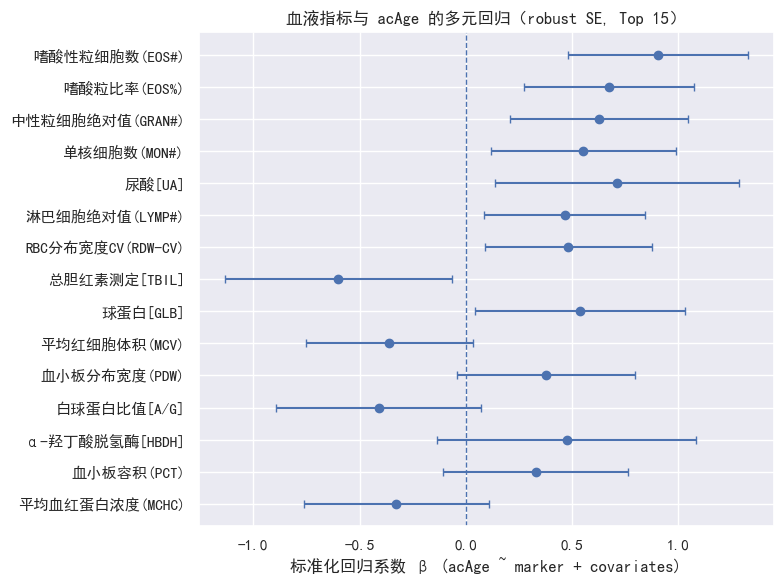

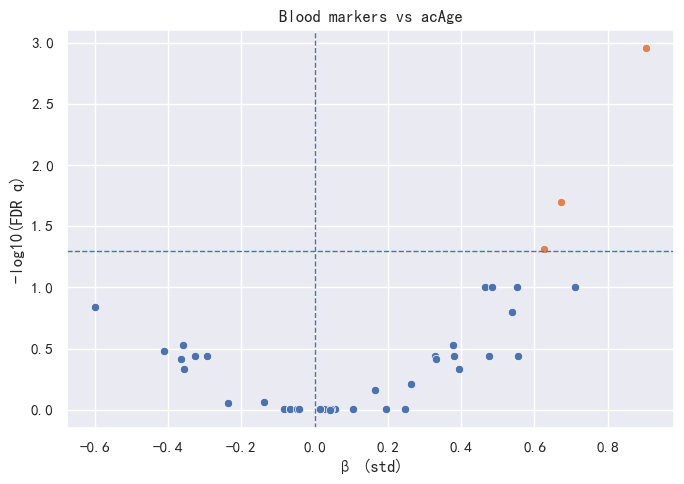

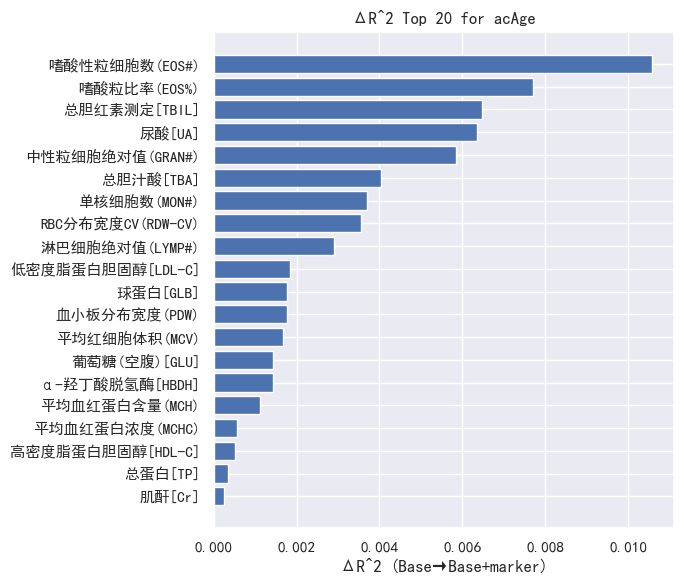

In [348]:
import matplotlib.pyplot as plt

top15 = reg_df.sort_values("p").head(15).copy()
top15 = top15.iloc[::-1]  # 反转让最显著在上
plt.figure(figsize=(8,6))
y = np.arange(len(top15))
plt.errorbar(top15["beta"], y, xerr=1.96*top15["se"], fmt='o', capsize=3)
plt.axvline(0, ls='--', lw=1)
plt.yticks(y, top15["marker"])
plt.xlabel("标准化回归系数 β (acAge ~ marker + covariates)")
plt.title("血液指标与 acAge 的多元回归（robust SE, Top 15）")
plt.tight_layout(); plt.show()


import numpy as np, seaborn as sns, matplotlib.pyplot as plt

volcano = reg_df.copy()  # 如果是从CSV读的，就先 reg_df = pd.read_csv(...)

# 兼容列名：优先用 q，否则用 q_beta；beta/beta_std 同理
qcol    = "q" if "q" in volcano.columns else ("q_beta" if "q_beta" in volcano.columns else None)
betacol = "beta" if "beta" in volcano.columns else ("beta_std" if "beta_std" in volcano.columns else None)

if qcol is None:
    # 没有 q 就从 p 现算一个 FDR（Benjamini–Hochberg）
    p = volcano["p"].to_numpy()
    order = np.argsort(p); ranks = np.empty_like(order); ranks[order] = np.arange(1, len(p)+1)
    q = p * len(p) / ranks; q[order] = np.minimum.accumulate(q[order][::-1])[::-1]
    volcano["q"] = np.minimum(q, 1.0); qcol = "q"

volcano["neglog10q"] = -np.log10(np.clip(volcano[qcol].to_numpy(), 1e-300, 1))

plt.figure(figsize=(7,5))
sns.scatterplot(data=volcano, x=betacol, y="neglog10q")
sig = volcano[qcol] < 0.05
sns.scatterplot(data=volcano[sig], x=betacol, y="neglog10q")
plt.axhline(-np.log10(0.05), ls="--", lw=1); plt.axvline(0, ls="--", lw=1)
plt.xlabel("β (std)"); plt.ylabel("-log10(FDR q)"); plt.title("Blood markers vs acAge")
plt.tight_layout(); plt.show()


top = dR2_df.head(20).iloc[::-1]
plt.figure(figsize=(7,6))
plt.barh(top["marker"], top["delta_R2"])
plt.xlabel("ΔR^2 (Base→Base+marker)"); plt.title("ΔR^2 Top 20 for acAge")
plt.tight_layout(); plt.show()


In [352]:
# ========= 配置 =========
RANDOM_STATE = 42
META_LABELS = {
    "高血压": "高血压",
    "糖尿病": "糖尿病",
    "高脂血症": "高脂血症",
    "高尿酸血症": "高尿酸血症",
    "代谢综合征": "代谢综合征" if "代谢综合征" in df.columns else None,
}
# 去掉 None
META_LABELS = {k:v for k,v in META_LABELS.items() if v is not None}

COVS = ["Age","Sex","Height","Weight"]   # 基线协变量（与之前一致）
N_BOOT = 1000

import numpy as np, pandas as pd, os, time
np.random.seed(RANDOM_STATE)
os.makedirs("stage5_strengthen", exist_ok=True)

# ========= 0) acAge 年龄标准化（z-score by age）=========
import numpy as np
import pandas as pd

# 以 Age 等频10分箱做“年龄层”标准化
age_bins = pd.qcut(df["Age"], q=10, duplicates="drop")

grp = df.groupby(age_bins)["acAge"]
mu_by_bin = grp.transform("mean")                      # 组内均值
sd_by_bin = grp.transform(lambda s: s.std(ddof=0))     # 组内标准差（ddof=0）

# 避免 0 或 NaN 的标准差导致除零
sd_by_bin = sd_by_bin.replace(0, np.nan)
global_sd = df["acAge"].std(ddof=0)

# 组内标准化：z = (acAge - 组内均值) / 组内标准差
df["acAge_z"] = ((df["acAge"] - mu_by_bin) / sd_by_bin).fillna(
    (df["acAge"] - df["acAge"].mean()) / (global_sd if global_sd > 0 else 1.0)
)

# ========= 1) 代谢负荷分数 =========
meta_cols = [v for v in META_LABELS.values() if v in df.columns]
df["Metabolic_Burden"] = df[meta_cols].fillna(0).sum(axis=1).astype(int)

# ========= 2) Logit：OR per 1-SD acAge_z（控制 Age/性别/体格）=========
try:
    import statsmodels.api as sm
    have_sm = True
except Exception as e:
    have_sm = False
    print("[Warn] 未安装 statsmodels；OR/IRR 分析将跳过（pip install statsmodels）。")

OR_rows = []
if have_sm:
    for lab, col in META_LABELS.items():
        if col not in df.columns: 
            continue
        sub = df[[col,"acAge_z"] + COVS].apply(pd.to_numeric, errors="coerce").dropna()
        if sub[col].sum() < 40 or (len(sub)-sub[col].sum())<40:  # 保证两类样本量
            continue
        y = sub[col].astype(int).values
        X = sub[["acAge_z"] + COVS].copy()
        # 标准化连续协变量（除 Sex）
        for c in COVS:
            if c=="Sex": continue
            mu,sd = X[c].mean(), X[c].std(ddof=0)
            if sd>0: X[c] = (X[c]-mu)/sd
        X = sm.add_constant(X)
        model = sm.Logit(y, X)
        res = model.fit(disp=False, maxiter=100)
        b = res.params["acAge_z"]; se = res.bse["acAge_z"]
        OR = np.exp(b); lo = np.exp(b-1.96*se); hi = np.exp(b+1.96*se); p = res.pvalues["acAge_z"]
        OR_rows.append([lab, len(sub), OR, lo, hi, p])
OR_df = pd.DataFrame(OR_rows, columns=["label","n","OR_per1SD","CI_lo","CI_hi","p"])
if len(OR_df):
    # FDR
    def fdr(p):
        p = np.array(p, float); n = len(p); order = np.argsort(p); ranks = np.empty_like(order); ranks[order]=np.arange(1,n+1)
        q = p * n / ranks; q[order] = np.minimum.accumulate(q[order][::-1])[::-1]; return np.minimum(q,1.0)
    OR_df["q"] = fdr(OR_df["p"])
    OR_df.sort_values("q", inplace=True)
    OR_df.to_csv("stage5_strengthen/01_OR_perSD_acAgez.csv", index=False)
    print("[1] OR 表已出：stage5_strengthen/01_OR_perSD_acAgez.csv")

# ========= 3) 趋势：acAge_z 五分位 → 患病率 & p_trend =========
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
trend_rows = []
for lab, col in META_LABELS.items():
    if col not in df.columns: continue
    sub = df[[col,"acAge_z"] + COVS].apply(pd.to_numeric, errors="coerce").dropna()
    if len(sub)<120: continue
    # 分位
    q = pd.qcut(sub["acAge_z"], 5, labels=False, duplicates="drop")
    prev = sub.groupby(q)[col].mean().values
    # p-trend：把分位(0..4)当连续变量做logit（控制 COVS）
    X = sub[["acAge_z"] + COVS].copy()
    X["Q"] = pd.qcut(sub["acAge_z"], 5, labels=False, duplicates="drop").astype(float)
    y = sub[col].astype(int).values
    # 用 statsmodels 精确一点
    if have_sm:
        X_sm = sm.add_constant(X[["Q"] + COVS])
        res = sm.Logit(y, X_sm).fit(disp=False, maxiter=100)
        p_trend = res.pvalues["Q"]
    else:
        p_trend = np.nan
    trend_rows.append([lab, len(sub)] + prev.tolist() + [p_trend])
trend_cols = ["label","n"] + [f"prev_Q{i}" for i in range(5)] + ["p_trend"]
trend_df = pd.DataFrame(trend_rows, columns=trend_cols)
trend_df.to_csv("stage5_strengthen/02_trend_quintiles.csv", index=False)
print("[2] 趋势表已出：stage5_strengthen/02_trend_quintiles.csv")

# ========= 4) 增量能力：AUC/ΔAUC + bootstrap 95%CI =========
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
def auc_cv(X, y, k=5, seed=42):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    oof = np.zeros(len(y))
    for tr, va in skf.split(X, y):
        pipe = Pipeline([("scaler", StandardScaler(with_mean=True, with_std=True)),
                         ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear"))])
        pipe.fit(X.iloc[tr], y.iloc[tr])
        oof[va] = pipe.predict_proba(X.iloc[va])[:,1]
    return roc_auc_score(y, oof), oof

def boot_ci_delta_auc(y, p_base, p_full, B=1000, seed=42):
    rng = np.random.default_rng(seed); n=len(y); deltas=[]
    from sklearn.metrics import roc_auc_score
    for _ in range(B):
        idx = rng.integers(0,n,size=n)
        deltas.append(roc_auc_score(y[idx], p_full[idx]) - roc_auc_score(y[idx], p_base[idx]))
    lo,hi = np.percentile(deltas,[2.5,97.5]); return float(np.mean(deltas)), float(lo), float(hi)

auc_rows = []
for lab, col in META_LABELS.items():
    if col not in df.columns: continue
    keep = df[[col] + ["acAge_z"] + COVS].apply(pd.to_numeric, errors="coerce").dropna().index
    y = df.loc[keep, col].astype(int)
    Xb = df.loc[keep, COVS]
    Xf = df.loc[keep, COVS + ["acAge_z"]]
    if y.sum()<40 or (len(y)-y.sum())<40: continue
    auc_b, p_b = auc_cv(Xb, y)
    auc_f, p_f = auc_cv(Xf, y)
    d, lo, hi = boot_ci_delta_auc(y.values, p_b, p_f, B=N_BOOT, seed=RANDOM_STATE)
    auc_rows.append([lab, len(y), auc_b, auc_f, auc_f-auc_b, d, lo, hi])
auc_df = pd.DataFrame(auc_rows, columns=["label","n","AUC_BASE","AUC_+acAgez","Delta_AUC","Delta_boot_mean","Delta_boot_lo","Delta_boot_hi"])
auc_df.sort_values("Delta_AUC", ascending=False, inplace=True)
auc_df.to_csv("stage5_strengthen/03_auc_increment_acAgez.csv", index=False)
print("[3] ΔAUC 表已出：stage5_strengthen/03_auc_increment_acAgez.csv")

# ========= 5) 代谢负荷分数：Poisson（稳健SE）/ IRR per 1-SD =========
IRR_rows = []
if have_sm:
    sub = df[["Metabolic_Burden","acAge_z"] + COVS].apply(pd.to_numeric, errors="coerce").dropna()
    y = sub["Metabolic_Burden"].values
    X = sm.add_constant(sub[["acAge_z"] + COVS])
    # Poisson + robust SE
    poisson = sm.GLM(y, X, family=sm.families.Poisson()).fit(cov_type="HC3")
    b = poisson.params["acAge_z"]; se = poisson.bse["acAge_z"]
    IRR = np.exp(b); lo = np.exp(b-1.96*se); hi = np.exp(b+1.96*se); p = poisson.pvalues["acAge_z"]
    IRR_rows.append(["Metabolic_Burden", len(sub), IRR, lo, hi, p])
IRR_df = pd.DataFrame(IRR_rows, columns=["outcome","n","IRR_per1SD","CI_lo","CI_hi","p"])
if len(IRR_df):
    IRR_df.to_csv("stage5_strengthen/04_IRR_metabolic_burden.csv", index=False)
    print("[4] IRR 表已出：stage5_strengthen/04_IRR_metabolic_burden.csv")


[1] OR 表已出：stage5_strengthen/01_OR_perSD_acAgez.csv
[2] 趋势表已出：stage5_strengthen/02_trend_quintiles.csv
[3] ΔAUC 表已出：stage5_strengthen/03_auc_increment_acAgez.csv
[4] IRR 表已出：stage5_strengthen/04_IRR_metabolic_burden.csv


In [380]:
# === D. 重分类 2×2 热图（以高尿酸为例；可替换 lab 名称） ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

OUT="figs_pub"; os.makedirs(OUT, exist_ok=True)
lab="高尿酸血症"
sub = df[["Age","Sex","Height","Weight","acAge_z", lab]].apply(pd.to_numeric, errors="coerce").dropna()
y = sub[lab].astype(int)
Xb=sub[["Age","Sex","Height","Weight"]]; Xf=sub[["Age","Sex","Height","Weight","acAge_z"]]

def oof(X,y):
    skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42); p=np.zeros(len(y))
    for tr,va in skf.split(X,y):
        pipe=Pipeline([("sc",StandardScaler()),("lr",LogisticRegression(max_iter=2000,class_weight="balanced",solver="liblinear"))])
        pipe.fit(X.iloc[tr],y.iloc[tr]); p[va]=pipe.predict_proba(X.iloc[va])[:,1]
    return p
p_b=oof(Xb,y); p_f=oof(Xf,y)
fpr,tpr,thr=roc_curve(y,p_b); t=thr[(tpr-fpr).argmax()]
base=(p_b>=t).astype(int); full=(p_f>=t).astype(int)

tab = pd.crosstab(base, full, rownames=['BASE'], colnames=['+acAge_z'])
tab_pct = (tab/tab.sum().sum()*100).round(1)

plt.figure(figsize=(4.2,3.8))
plt.imshow(tab_pct.values, cmap="Blues")
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{tab.values[i,j]}\n({tab_pct.values[i,j]}%)", ha="center", va="center", color="black")
plt.xticks([0,1],["Neg","Pos"]); plt.yticks([0,1],["Neg","Pos"])
plt.title(f"{lab}：重分类矩阵 @ t* (Youden on BASE)"); plt.tight_layout()
plt.savefig(f"{OUT}/S5_reclass_heatmap__{lab}.png", dpi=300); plt.close()
print("Saved S5_reclass_heatmap__*.png")


Saved S5_reclass_heatmap__*.png


In [382]:
# === E. 树模型特征重要性 Top20（XGB / LGBM）===
import os, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

OUT="figs_pub"; os.makedirs(OUT, exist_ok=True)
X = df[cpet_vars].apply(pd.to_numeric, errors="coerce"); y = pd.to_numeric(df["Age"], errors="coerce")
keep = X.dropna().index.intersection(y.dropna().index); X=X.loc[keep]; y=y.loc[keep]
Xtr,Xte,ytr,yte = train_test_split(X,y,test_size=0.2,random_state=42)

xgb = XGBRegressor(n_estimators=1000, learning_rate=0.03, max_depth=4, subsample=0.8, colsample_bytree=0.8,
                   reg_lambda=1.0, random_state=42, n_jobs=-1, tree_method="hist")
xgb.fit(Xtr,ytr)
imp = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)

plt.figure(figsize=(7,6)); plt.barh(imp.index[::-1], imp.values[::-1]); plt.title("XGB 特征重要性 Top20（CPET-only）")
plt.tight_layout(); plt.savefig(f"{OUT}/S2C_xgb_importance_top20.png", dpi=300); plt.close()

lgb = LGBMRegressor(n_estimators=1500, learning_rate=0.02, num_leaves=31, subsample=0.8, colsample_bytree=0.8,
                    reg_lambda=1.0, random_state=42, n_jobs=-1)
lgb.fit(Xtr,ytr)
imp2 = pd.Series(lgb.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
plt.figure(figsize=(7,6)); plt.barh(imp2.index[::-1], imp2.values[::-1]); plt.title("LightGBM 特征重要性 Top20（CPET-only）")
plt.tight_layout(); plt.savefig(f"{OUT}/S2D_lgb_importance_top20.png", dpi=300); plt.close()
print("Saved S2C/S2D to figs_pub/")


Saved S2C/S2D to figs_pub/


In [61]:
# 假设你已经有训练集的 OOF 预测表 oof_L1（列=模型），以及 y_train
import numpy as np
import pandas as pd

# 1) 每个模型与真值的相关系数（≈ sqrt(R²））
r_with_y = oof_L1.apply(lambda col: np.corrcoef(col, y_train)[0,1]).sort_values(ascending=False)
print("corr(pred, y):\n", r_with_y)

# 2) 各模型之间的相关矩阵（看“同质化”）
corr_between_models = oof_L1.corr()
print(corr_between_models.round(2))


corr(pred, y):
 SVR                 0.772634
XGBoost             0.752370
LightGBM            0.745759
GradientBoosting    0.744258
RandomForest        0.735486
KNN                 0.719967
dtype: float64
                   SVR  XGBoost  LightGBM  GradientBoosting  RandomForest  \
SVR               1.00     0.93      0.92              0.92          0.91   
XGBoost           0.93     1.00      0.98              0.96          0.96   
LightGBM          0.92     0.98      1.00              0.95          0.96   
GradientBoosting  0.92     0.96      0.95              1.00          0.96   
RandomForest      0.91     0.96      0.96              0.96          1.00   
KNN               0.89     0.89      0.88              0.89          0.90   

                   KNN  
SVR               0.89  
XGBoost           0.89  
LightGBM          0.88  
GradientBoosting  0.89  
RandomForest      0.90  
KNN               1.00  


In [354]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, brier_score_loss

def oof_preds(X, y, k=5, seed=42):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    oof = np.zeros(len(y))
    for tr, va in skf.split(X, y):
        pipe = Pipeline([("sc", StandardScaler(with_mean=True, with_std=True)),
                         ("lr", LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear"))])
        pipe.fit(X.iloc[tr], y.iloc[tr])
        oof[va] = pipe.predict_proba(X.iloc[va])[:,1]
    return oof

def idi_nri(y, p_base, p_full):
    y = np.asarray(y).astype(int)
    pos, neg = y==1, y==0
    # IDI（均值差改进）
    disc_b = p_base[pos].mean() - p_base[neg].mean()
    disc_f = p_full[pos].mean() - p_full[neg].mean()
    IDI = disc_f - disc_b
    # 无阈值 NRI（cfNRI）
    up_pos  = (p_full[pos] > p_base[pos]).mean()
    down_pos= (p_full[pos] < p_base[pos]).mean()
    up_neg  = (p_full[neg] > p_base[neg]).mean()
    down_neg= (p_full[neg] < p_base[neg]).mean()
    NRI = (up_pos - down_pos) + (down_neg - up_neg)
    return IDI, NRI

# 以“高尿酸血症”为例：
y = df["高尿酸血症"].astype(int)
keep = df[["acAge_z","Age","Sex","Height","Weight","高尿酸血症"]].dropna().index
y = y.loc[keep]
Xb = df.loc[keep, ["Age","Sex","Height","Weight"]]
Xf = df.loc[keep, ["Age","Sex","Height","Weight","acAge_z"]]
p_b = oof_preds(Xb, y); p_f = oof_preds(Xf, y)
auc_b = roc_auc_score(y, p_b); auc_f = roc_auc_score(y, p_f)
IDI, NRI = idi_nri(y, p_b, p_f)
dBrier = brier_score_loss(y, p_b) - brier_score_loss(y, p_f)
print(f"AUC {auc_b:.3f}→{auc_f:.3f} (Δ={auc_f-auc_b:.3f}); IDI={IDI:.003f}; NRI={NRI:.003f}; ΔBrier={dBrier:.003f}")


AUC 0.717→0.739 (Δ=0.022); IDI=0.031; NRI=0.434; ΔBrier=0.006


In [356]:
import numpy as np
from sklearn.metrics import roc_auc_score, brier_score_loss

def idi_nri(y, p_base, p_full):
    y = np.asarray(y).astype(int)
    pos, neg = y==1, y==0
    IDI = (p_full[pos].mean()-p_full[neg].mean()) - (p_base[pos].mean()-p_base[neg].mean())
    up_pos  = (p_full[pos] > p_base[pos]).mean()
    down_pos= (p_full[pos] < p_base[pos]).mean()
    up_neg  = (p_full[neg] > p_base[neg]).mean()
    down_neg= (p_full[neg] < p_base[neg]).mean()
    NRI = (up_pos - down_pos) + (down_neg - up_neg)
    return float(IDI), float(NRI)

def bootstrap_metrics(y, p_b, p_f, B=2000, seed=42):
    rng=np.random.default_rng(seed); n=len(y)
    dAUC=[]; IDI=[]; NRI=[]; dB=[]
    for _ in range(B):
        idx=rng.integers(0,n,n)
        yy=y[idx]; pb=p_b[idx]; pf=p_f[idx]
        dAUC.append(roc_auc_score(yy,pf)-roc_auc_score(yy,pb))
        idi, nri = idi_nri(yy, pb, pf); IDI.append(idi); NRI.append(nri)
        dB.append(brier_score_loss(yy,pb)-brier_score_loss(yy,pf))
    def stat(a): 
        a=np.array(a); m=float(a.mean()); lo,hi=np.percentile(a,[2.5,97.5]); 
        return m, float(lo), float(hi)
    return {"ΔAUC":stat(dAUC), "IDI":stat(IDI), "NRI":stat(NRI), "ΔBrier":stat(dB)}

ci = bootstrap_metrics(y.values, p_b, p_f, B=2000, seed=42)
ci


{'ΔAUC': (0.022227189391415585, -0.010888199867295353, 0.054687760290001323),
 'IDI': (0.031037070945226296, 0.0011074315678952676, 0.05968290813036504),
 'NRI': (0.43852118897160974, 0.16994504875283947, 0.713161388862372),
 'ΔBrier': (0.0062870887026131965,
  0.0029868566995174747,
  0.009551469981278237)}

In [357]:
import pandas as pd
from sklearn.metrics import roc_curve

# 选择阈值：Youden on base
fpr, tpr, thr = roc_curve(y, p_b)
t_star = thr[(tpr - fpr).argmax()]

def reclass_table(y, p_b, p_f, t):
    base = (p_b>=t).astype(int); full = (p_f>=t).astype(int)
    tab_all = pd.crosstab(base, full, rownames=['Base'], colnames=['+acAge_z'])
    tab_evt = pd.crosstab(base[y==1], full[y==1]).reindex(index=[0,1], columns=[0,1], fill_value=0)
    tab_none= pd.crosstab(base[y==0], full[y==0]).reindex(index=[0,1], columns=[0,1], fill_value=0)
    return tab_all, tab_evt, tab_none

tab_all, tab_evt, tab_none = reclass_table(y.values, p_b, p_f, t_star)
t_star, tab_all, tab_evt, tab_none


(0.5300553803152762,
 +acAge_z     0    1
 Base               
 0         1574  118
 1          140  715,
 col_0   0   1
 row_0        
 0      12   3
 1       4  31,
 col_0     0    1
 row_0           
 0      1562  115
 1       136  684)

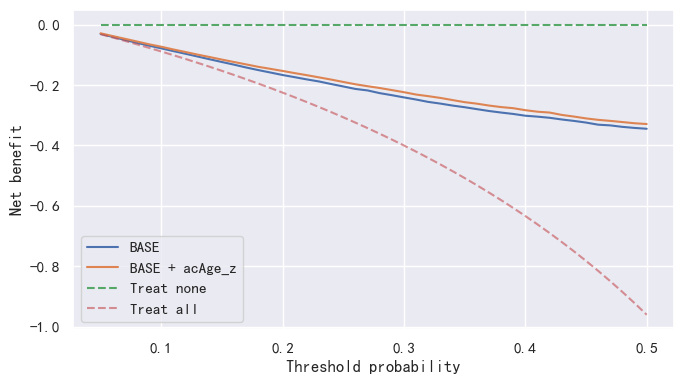

In [360]:
import numpy as np, pandas as pd

def decision_curve(y, p, thresholds=np.linspace(0.05,0.5,46)):
    y=np.asarray(y).astype(int); p=np.asarray(p)
    rows=[]
    for t in thresholds:
        pred=(p>=t).astype(int)
        TP=((pred==1)&(y==1)).sum(); FP=((pred==1)&(y==0)).sum()
        n=len(y); pt=t
        nb = TP/n - FP/n * (pt/(1-pt))
        rows.append((t, nb))
    return pd.DataFrame(rows, columns=["threshold","net_benefit"])

dca_base = decision_curve(y, p_b)
dca_full = decision_curve(y, p_f)

# 画图（matplotlib）
import matplotlib.pyplot as plt
plt.figure(figsize=(7,4))
plt.plot(dca_base["threshold"], dca_base["net_benefit"], label="BASE")
plt.plot(dca_full["threshold"], dca_full["net_benefit"], label="BASE + acAge_z")
plt.plot(dca_base["threshold"], 0*dca_base["threshold"], linestyle="--", label="Treat none")
prev = y.mean()
plt.plot(dca_base["threshold"], dca_base["threshold"]*0 + (prev - (1-prev)*(dca_base["threshold"]/(1-dca_base["threshold"]))), 
         linestyle="--", label="Treat all", alpha=0.6)  # 近似线可选
plt.xlabel("Threshold probability"); plt.ylabel("Net benefit")
plt.legend(); plt.tight_layout(); plt.show()


In [362]:
# ==== 一键可视化汇总（出版级别，含保存与进度） ====
import os, re, numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, brier_score_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
sns.set(style="whitegrid")
plt.rcParams["axes.unicode_minus"] = False
plt.rcParams["font.sans-serif"] = ["SimHei","Microsoft YaHei","Arial Unicode MS","DejaVu Sans"]

OUTDIR = "figs_pub"
os.makedirs(OUTDIR, exist_ok=True)

def safename(s): 
    return re.sub(r"[^\w\-\u4e00-\u9fa5]+","_", str(s)).strip("_")

def savefig(base):
    for ext in ["png","pdf"]:
        p = os.path.join(OUTDIR, f"{safename(base)}.{ext}")
        plt.savefig(p, dpi=300, bbox_inches="tight")
    print(f"[Saved] {base} -> {OUTDIR}/(.png/.pdf)")
    plt.close()

# ---------- 读入主表（若存在） ----------
eff_path = "stage3_effects_cliffs_FDR.csv"
reg_path = "stage4_blood/02_regression_assoc.csv"
dR2_path = "stage4_blood/04_deltaR2_cv.csv"
auc_path = "stage5_strengthen/03_auc_increment_acAgez.csv"
or_path  = "stage5_strengthen/01_OR_perSD_acAgez.csv"
trend_path = "stage5_strengthen/02_trend_quintiles.csv"

effects = pd.read_csv(eff_path) if os.path.exists(eff_path) else None
reg_df  = pd.read_csv(reg_path) if os.path.exists(reg_path) else None
dR2_df  = pd.read_csv(dR2_path) if os.path.exists(dR2_path) else None
auc_df  = pd.read_csv(auc_path) if os.path.exists(auc_path) else None
OR_df   = pd.read_csv(or_path) if os.path.exists(or_path) else None
trend_df= pd.read_csv(trend_path) if os.path.exists(trend_path) else None

# 若需要用到 df（箱线图/DCA等），确保存在 cpAge/acAge/acAge_z
try:
    _ = df.shape
except NameError:
    df = None

if df is not None and ("cpAge" not in df.columns or "acAge" not in df.columns):
    try:
        tmp = pd.read_csv("stage2_runs/cpAge_acAge_oof.csv")
        for col in ["cpAge","acAge"]:
            if col in tmp.columns: df[col] = pd.to_numeric(tmp[col], errors="coerce")
        print("[Info] 已从 stage2_runs/cpAge_acAge_oof.csv 读入 cpAge/acAge")
    except Exception as e:
        print("[Warn] 未能加载 cpAge/acAge：", e)

# acAge_z（若 stage5 已生成，则直接用；否则按年龄十等分估计SD）
if df is not None:
    if "acAge_z" not in df.columns and "acAge" in df.columns and "Age" in df.columns:
        try:
            age_bins = pd.qcut(df["Age"], q=10, duplicates="drop")
            sd_by_bin = df["acAge"].groupby(age_bins).transform(lambda s: s.std(ddof=0).replace(0, np.nan))
            global_sd = df["acAge"].std(ddof=0)
            df["acAge_z"] = df["acAge"] / sd_by_bin.fillna(global_sd)
            print("[Info] acAge_z 在线生成完成")
        except Exception as e:
            print("[Warn] acAge_z 生成失败：", e)

# =============== 图 A：acAge/cpAge/Age 组间箱线 + 抖点（按 acAge |δ| 排前K） ===============
if (effects is not None) and (df is not None):
    try:
        # 找到对照掩码（若第三阶段的 ctrl_mask 不在内存，这里重建一个宽松对照）
        if "无疾病" in df.columns:
            ctrl_mask = (df["无疾病"] == 1)
        else:
            summary_cols = [c for c in df.columns if str(c).endswith("汇总")]
            ctrl_mask = (df[summary_cols].fillna(0).sum(axis=1) == 0) if summary_cols else pd.Series(False, index=df.index)

        tops = (effects[(effects["metric"]=="acAge") & (effects["q"]<0.05)]
                .sort_values("abs_delta", ascending=False)["label"].head(8).tolist())
        for lab in tops:
            if lab not in df.columns: 
                continue
            mask = (df[lab]==1) | (ctrl_mask)
            sub  = df.loc[mask, ["Age","cpAge","acAge", lab]].copy()
            if sub.empty: 
                continue
            sub["group"] = np.where(sub[lab]==1, lab, "对照"); sub.drop(columns=[lab], inplace=True)
            sub_long = sub.melt(id_vars="group", var_name="metric", value_name="value")

            fig, ax = plt.subplots(figsize=(8,4))
            sns.boxplot(data=sub_long, x="metric", y="value", hue="group", showfliers=False, ax=ax)
            sns.stripplot(data=sub_long, x="metric", y="value", hue="group",
                          dodge=True, alpha=0.35, linewidth=0, ax=ax)
            # 合并重复图例
            handles, labels = ax.get_legend_handles_labels()
            uniq = {}
            for h,l in zip(handles, labels): 
                if l not in uniq: uniq[l]=h
            ax.legend(uniq.values(), uniq.keys(), title="分组", frameon=True, loc="best")
            ax.set_title(f"{lab}: Age vs cpAge vs acAge")
            plt.tight_layout(); savefig(f"A_box_across_metrics__{lab}")
    except Exception as e:
        print("[Skip 图A]", e)
else:
    print("[Skip 图A] 需要 effects + df")

# =============== 图 B：多元回归森林图（Top 15 按 q） & 火山图 ===============
if reg_df is not None and len(reg_df):
    try:
        top15 = reg_df.sort_values("p").head(15).copy().iloc[::-1]
        fig, ax = plt.subplots(figsize=(8,6))
        y = np.arange(len(top15))
        ax.errorbar(top15["beta_std"], y, xerr=1.96*top15["se"], fmt='o', capsize=3)
        ax.axvline(0, ls='--', lw=1)
        ax.set_yticks(y); ax.set_yticklabels(top15["marker"])
        ax.set_xlabel("标准化回归系数 β (acAge ~ marker + 协变量)")
        ax.set_title("血液指标与 acAge 的多元回归（robust SE, Top 15）")
        plt.tight_layout(); savefig("B_forest_regression_top15")

        volcano = reg_df.copy()
        volcano["neglog10q"] = -np.log10(volcano["q"].replace(0, 1e-300))
        fig, ax = plt.subplots(figsize=(7,5))
        sns.scatterplot(data=volcano, x="beta_std", y="neglog10q", ax=ax)
        sig = volcano["q"]<0.05
        sns.scatterplot(data=volcano[sig], x="beta_std", y="neglog10q", ax=ax)
        ax.axhline(-np.log10(0.05), ls="--", lw=1); ax.axvline(0, ls="--", lw=1)
        ax.set_xlabel("β (std)"); ax.set_ylabel("-log10(FDR q)"); ax.set_title("血液指标 vs acAge（火山图）")
        plt.tight_layout(); savefig("B_volcano_reg")
    except Exception as e:
        print("[Skip 图B]", e)
else:
    print("[Skip 图B] 未发现 stage4 回归结果")

# =============== 图 C：ΔR² Top20 条形（stage4） ===============
if dR2_df is not None and len(dR2_df):
    try:
        top = dR2_df.head(20).iloc[::-1]
        fig, ax = plt.subplots(figsize=(7,6))
        ax.barh(top["marker"], top["delta_R2"])
        ax.set_xlabel("ΔR² (Base→Base+marker)"); ax.set_title("ΔR² Top 20 for acAge")
        plt.tight_layout(); savefig("C_deltaR2_top20")
    except Exception as e:
        print("[Skip 图C]", e)
else:
    print("[Skip 图C] 未发现 stage4 ΔR² 结果")

# =============== 图 D：OR per 1-SD 森林图（stage5） ===============
if OR_df is not None and len(OR_df):
    try:
        top = OR_df.sort_values("q").head(10).iloc[::-1]
        fig, ax = plt.subplots(figsize=(7,5))
        y = np.arange(len(top))
        x = top["OR_per1SD"]; lo = top["CI_lo"]; hi = top["CI_hi"]
        ax.errorbar(x, y, xerr=[x-lo, hi-x], fmt='o', capsize=3)
        ax.axvline(1.0, ls='--', lw=1)
        ax.set_yticks(y); ax.set_yticklabels(top["label"])
        ax.set_xlabel("OR per 1-SD increase in acAge_z")
        ax.set_title("acAge_z 与代谢标签的关联（多变量，Top 10）")
        plt.tight_layout(); savefig("D_OR_perSD_top10")
    except Exception as e:
        print("[Skip 图D]", e)
else:
    print("[Skip 图D] 未发现 stage5 OR 结果")

# =============== 图 E：ΔAUC 条形 + bootstrap CI（stage5） ===============
if auc_df is not None and len(auc_df):
    try:
        show = auc_df.copy().head(10).iloc[::-1]
        fig, ax = plt.subplots(figsize=(7,5))
        ax.barh(show["label"], show["Delta_AUC"], alpha=0.8)
        for i,(lo,hi) in enumerate(zip(show["Delta_boot_lo"], show["Delta_boot_hi"])):
            ax.plot([lo,hi],[i,i], '-', lw=2)
        ax.set_xlabel("ΔAUC (BASE → +acAge_z)")
        ax.set_title("增量判别能力（5折CV, bootstrap CI）")
        plt.tight_layout(); savefig("E_deltaAUC_bootstrap")
    except Exception as e:
        print("[Skip 图E]", e)
else:
    print("[Skip 图E] 未发现 stage5 ΔAUC 结果")

# =============== 图 F：患病率趋势（acAge_z 五分位） ===============
if trend_df is not None and len(trend_df):
    try:
        # 仅画前 6 行
        show = trend_df.head(6).copy()
        for _, r in show.iterrows():
            label = r["label"]
            prev = [r.get(f"prev_Q{i}", np.nan) for i in range(5)]
            fig, ax = plt.subplots(figsize=(5.2,3.6))
            ax.plot(range(1,len(prev)+1), prev, marker="o")
            ax.set_xticks(range(1,len(prev)+1)); ax.set_xlabel("acAge_z 五分位")
            ax.set_ylabel("患病率"); ax.set_title(f"{label}: 患病率随 acAge_z 分位的趋势")
            plt.tight_layout(); savefig(f"F_trend_prev_quintiles__{label}")
    except Exception as e:
        print("[Skip 图F]", e)
else:
    print("[Skip 图F] 未发现 stage5 趋势表")

# =============== 图 G：DCA + 重分类表（选择 ΔAUC Top2 标签） ===============
def oof_preds(X, y, k=5, seed=42):
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
    oof = np.zeros(len(y))
    for tr, va in skf.split(X, y):
        pipe = Pipeline([("sc", StandardScaler(with_mean=True, with_std=True)),
                         ("lr", LogisticRegression(max_iter=2000, class_weight="balanced", solver="liblinear"))])
        pipe.fit(X.iloc[tr], y.iloc[tr])
        oof[va] = pipe.predict_proba(X.iloc[va])[:,1]
    return oof

def decision_curve(y, p, thresholds=np.linspace(0.05,0.5,46)):
    y=np.asarray(y).astype(int); p=np.asarray(p)
    rows=[]
    for t in thresholds:
        pred=(p>=t).astype(int)
        TP=((pred==1)&(y==1)).sum(); FP=((pred==1)&(y==0)).sum()
        n=len(y); pt=t
        nb = TP/n - FP/n * (pt/(1-pt))
        rows.append((t, nb))
    return pd.DataFrame(rows, columns=["threshold","net_benefit"])

if (auc_df is not None) and (df is not None):
    try:
        # 只在 df 里存在的标签里选 ΔAUC Top 2
        cand = [lab for lab in auc_df["label"].tolist() if lab in (df.columns if df is not None else [])]
        pick = [x for x in auc_df.sort_values("Delta_AUC", ascending=False)["label"].tolist() if x in cand][:2]
        for lab in pick:
            keep_cols = ["Age","Sex","Height","Weight","acAge_z", lab]
            sub = df[keep_cols].apply(pd.to_numeric, errors="coerce").dropna()
            if sub.empty: 
                continue
            y = sub[lab].astype(int)
            Xb = sub[["Age","Sex","Height","Weight"]]
            Xf = sub[["Age","Sex","Height","Weight","acAge_z"]]
            p_b = oof_preds(Xb, y); p_f = oof_preds(Xf, y)

            # DCA
            dca_b = decision_curve(y, p_b); dca_f = decision_curve(y, p_f)
            fig, ax = plt.subplots(figsize=(7,4))
            ax.plot(dca_b["threshold"], dca_b["net_benefit"], label="BASE")
            ax.plot(dca_f["threshold"], dca_f["net_benefit"], label="BASE + acAge_z")
            ax.axhline(0, ls="--", lw=1, label="Treat none")
            ax.set_xlabel("阈值概率"); ax.set_ylabel("净获益"); ax.set_title(f"{lab}: 决策曲线分析")
            ax.legend()
            plt.tight_layout(); savefig(f"G_DCA__{lab}")

            # 重分类（Youden on base）
            fpr, tpr, thr = roc_curve(y, p_b)
            t_star = thr[(tpr - fpr).argmax()]
            base  = (p_b>=t_star).astype(int)
            full  = (p_f>=t_star).astype(int)
            tab = pd.crosstab(base, full, rownames=['BASE'], colnames=['+acAge_z'])
            print(f"[Reclass @ {lab}] 阈值={t_star:.3f}\n{tab}\n")
    except Exception as e:
        print("[Skip 图G]", e)
else:
    print("[Skip 图G] 需要 auc_df + df")

# =============== 图 H：acAge 与 Age 的关系（校正成功性检查） ===============
if df is not None and "acAge" in df.columns and "Age" in df.columns:
    try:
        from scipy.stats import pearsonr
        r1 = pearsonr(df["cpAge"], df["Age"])[0] if "cpAge" in df.columns else np.nan
        r2 = pearsonr(df["acAge"], df["Age"])[0]
        fig, ax = plt.subplots(1,2, figsize=(10,4))
        if "cpAge" in df.columns:
            ax[0].scatter(df["Age"], df["cpAge"], s=8, alpha=0.6)
            ax[0].set_title(f"cpAge vs Age (r={r1:.2f})"); ax[0].set_xlabel("Age"); ax[0].set_ylabel("cpAge")
        else:
            ax[0].axis("off")
        ax[1].scatter(df["Age"], df["acAge"], s=8, alpha=0.6)
        ax[1].axhline(0, ls="--", lw=1)
        ax[1].set_title(f"acAge vs Age (r={r2:.02f}, 期望~0)"); ax[1].set_xlabel("Age"); ax[1].set_ylabel("acAge")
        plt.tight_layout(); savefig("H_age_correlation_check")
    except Exception as e:
        print("[Skip 图H]", e)
else:
    print("[Skip 图H] 需要 df 含 Age/acAge")


[Saved] A_box_across_metrics__高尿酸血症 -> figs_pub/(.png/.pdf)
[Saved] A_box_across_metrics__支架术后 -> figs_pub/(.png/.pdf)
[Saved] A_box_across_metrics__高血压 -> figs_pub/(.png/.pdf)
[Saved] A_box_across_metrics__冠心病 -> figs_pub/(.png/.pdf)
[Saved] A_box_across_metrics__代谢性疾病_汇总 -> figs_pub/(.png/.pdf)
[Saved] A_box_across_metrics__高脂血症 -> figs_pub/(.png/.pdf)
[Saved] A_box_across_metrics__糖尿病 -> figs_pub/(.png/.pdf)
[Saved] A_box_across_metrics__心血管疾病_汇总 -> figs_pub/(.png/.pdf)
[Saved] B_forest_regression_top15 -> figs_pub/(.png/.pdf)
[Saved] B_volcano_reg -> figs_pub/(.png/.pdf)
[Saved] C_deltaR2_top20 -> figs_pub/(.png/.pdf)
[Saved] D_OR_perSD_top10 -> figs_pub/(.png/.pdf)
[Saved] E_deltaAUC_bootstrap -> figs_pub/(.png/.pdf)
[Saved] F_trend_prev_quintiles__高血压 -> figs_pub/(.png/.pdf)
[Saved] F_trend_prev_quintiles__糖尿病 -> figs_pub/(.png/.pdf)
[Saved] F_trend_prev_quintiles__高脂血症 -> figs_pub/(.png/.pdf)
[Saved] F_trend_prev_quintiles__高尿酸血症 -> figs_pub/(.png/.pdf)
[Saved] F_trend_prev_quin

In [27]:
# 1) 你已经有 df['acAge']、df['acAge_resid']
print("Spearman(acAge, Age)      =", df[['acAge','Age']].corr(method='spearman').iloc[0,1])
print("Spearman(acAge_resid, Age) =", df[['acAge_resid','Age']].corr(method='spearman').iloc[0,1])


Spearman(acAge, Age)      = -0.6416455557070482
Spearman(acAge_resid, Age) = 0.0216494731473438


In [31]:
# 以 5 岁为窗口做滚动中位数和MAD
df = df.sort_values('Age').reset_index(drop=True)
win = 101  # 调整为约等价于 ~5 岁宽的样本数
med = df['acAge_resid'].rolling(win, center=True, min_periods=25).median()
mad = (df['acAge_resid'] - med).abs().rolling(win, center=True, min_periods=25).median() + 1e-9
df['acAge_z'] = (df['acAge_resid'] - med) / (1.4826 * mad)  # 1.4826*MAD≈σ
print("Spearman(acAge_z, Age) =", df[['acAge_z','Age']].corr(method='spearman').iloc[0,1])


Spearman(acAge_z, Age) = -0.017269411297213183


In [13]:
# ========================= 批量评估：心肺年龄 -> 疾病分类 =========================
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV, Ridge, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from sklearn.ensemble import StackingRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings("ignore")

try:
    from xgboost import XGBClassifier
except ImportError:
    XGBClassifier = None

try:
    from lightgbm import LGBMClassifier
except ImportError:
    LGBMClassifier = None

# ---------- 0) 从 df 中自动识别“特征列”与“标签列” ----------
if 'Age' not in df.columns:
    raise ValueError("df 中必须包含 'Age' 列")

# 细粒度/顶层标签列（只取 df 里真正存在的）
fine_labels = [c for c in PATTERNS.keys() if c in df.columns]
top_labels  = [c for c in TOP_LEVEL.keys() if c in df.columns]

# 辅助/非特征列
aux_cols = [c for c in ['高血压等级','未识别','诊断缺失','cpAge'] if c in df.columns]

# 候选数值特征列：df 的数值列，排除 Age、所有标签列、辅助列
num_cols_all = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in num_cols_all if c not in (['Age'] + fine_labels + top_labels + aux_cols)]

print(f"✅ 识别到 {len(feature_cols)} 个数值特征列用于回归：")
print(feature_cols[:30], "..." if len(feature_cols) > 30 else "")

# 目标（回归 Age；分类用各疾病列）
X_all = df[feature_cols].copy()
y_age_all = df['Age'].copy()

# 需要评估的疾病标签（顶层标签为主）
disease_labels = top_labels.copy()

# 样本阈值（可调）
MIN_POS = 25
MIN_NEG = 25

# ---------------------- 1) 定义：回归管线（生成心肺年龄） ----------------------
def build_reg_pipe():
    base_models = [
        ('ridge', Ridge()),
        ('gbdt', GradientBoostingRegressor(random_state=42)),
        ('mlp', MLPRegressor(random_state=42, max_iter=1000))
    ]
    final_model = Ridge()
    stack_reg = StackingRegressor(
        estimators=base_models,
        final_estimator=final_model,
        passthrough=False,
        cv=5,
        n_jobs=-1
    )
    reg_pipe = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler()),
        ('lasso_select', SelectFromModel(estimator=LassoCV(cv=5, random_state=42), threshold='mean')),
        ('reg', stack_reg)
    ])
    return reg_pipe

✅ 识别到 51 个数值特征列用于回归：
['Sex', 'Weight', 'Height', '卧位心室率', '峰值心率', '峰值功率', '峰值氧脉', 'VE/VCO2斜率.1', '静息血压-收缩压', '静息血压-舒张压', 'FVC', 'VCmax', 'FEV1', 'FEV1/FVC', 'MVV', '运动中最高收缩压', '运动终止后3分钟收缩压', '运动中最高舒张压', '运动终止后3分钟舒张压', '运动终止后1分钟心率', '运动终止后2分钟心率', '运动终止后3分钟心率', '峰值氧耗', '峰值公斤氧耗', '峰值分钟通气量', '呼吸商', '每分钟通气量(毫升)', 'load-maxload', 'VO2-AT', 'VCO2-AT'] ...


In [21]:
X

,Sex,Weight,Height,卧位心室率,峰值心率,峰值功率,峰值氧脉,VE/VCO2斜率.1,静息血压-收缩压,静息血压-舒张压,...,f-ergo-AT,BR-AT,EQO2-Max.Load,EQCO2-Max.Load,PETO2-AT,PETO2-Max.Load,PETCO2-AT,PETCO2-Max.Load,MAX BP*HR,Threshold Power
0,0.0,60.0,154.0,74.0,122.0,72.0,6.7,NaN,127.0,67.0,...,22.0,82.0,26.0,26.0,104.1,107.3,41.6,42.1,20862.0,52.0
1,1.0,70.0,161.0,86.0,115.0,112.0,10.7,NaN,106.0,75.0,...,21.0,80.0,37.0,33.0,106.2,115.2,37.2,37.0,17940.0,67.0
2,1.0,63.0,165.0,80.0,135.0,120.0,7.8,29.28,131.0,76.0,...,27.0,86.0,39.0,32.0,109.5,119.0,39.6,37.7,22815.0,86.0
3,1.0,65.0,165.0,66.0,115.0,98.0,9.2,23.49,167.0,86.0,...,16.0,85.0,27.0,24.0,95.8,108.5,47.3,46.5,25300.0,63.0
4,1.0,87.0,172.0,69.0,123.0,152.0,15.1,NaN,138.0,88.0,...,18.0,83.0,30.0,27.0,104.8,111.1,38.9,41.5,22878.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4429,0.0,53.0,151.0,69.0,145.0,77.0,6.2,NaN,121.0,85.0,...,19.0,86.0,23.0,25.0,94.6,99.3,42.0,45.4,22910.0,57.0
4430,1.0,67.0,181.0,63.0,161.0,179.0,12.9,NaN,116.0,86.0,...,27.0,83.0,29.0,27.0,105.4,111.9,44.3,41.1,28497.0,123.0
4431,0.0,65.0,160.0,90.0,169.0,140.0,9.6,NaN,103.0,69.0,...,26.0,69.0,30.0,31.0,110.2,113.9,27.5,33.8,27040.0,86.0
4432,1.0,71.0,169.0,79.0,135.0,162.0,14.6,NaN,116.0,73.0,...,15.0,83.0,25.0,24.0,100.1,107.1,45.7,44.3,24975.0,99.0


In [ ]:
# ---------------------- 4) 汇总输出 ----------------------
res_df = pd.DataFrame(all_results)
if len(res_df) == 0:
    print("没有合格的标签（正/负样本过少），请降低 MIN_POS/MIN_NEG 或更换标签。")
else:
    # 主要按 Label 分组，挑每个 Label 下 AUC 最高的行；若无AUC（多分类/无法算），则按 F1
    def pick_best(g):
        g = g.copy()
        if g['AUC'].notna().any():
            return g.sort_values(['AUC','F1_macro','ACC'], ascending=False).iloc[0]
        else:
            return g.sort_values(['F1_macro','ACC'], ascending=False).iloc[0]
    best_per_label = res_df.groupby('Label', as_index=False).apply(pick_best).reset_index(drop=True)

    print("\n===== 每个疾病标签的最佳组合（按AUC优先；无AUC则按F1） =====")
    display_cols = ['Label','Pos','Neg','Reg_CV_RMSE','Combo','Model','AUC','F1_macro','ACC']
    print(best_per_label[display_cols].sort_values('AUC', ascending=False, na_position='last'))

    print("\n===== 全量明细（可另存为CSV便于筛选） =====")
    print(res_df.sort_values(['Label','Combo','Model']))

    # 可保存
    # res_df.to_csv('cls_results_all_labels.csv', index=False)
    # best_per_label.to_csv('cls_results_best_per_label.csv', index=False)

if skipped:
    print("\n以下标签因阳性/阴性样本过少而跳过：")
    for lab, p, n in skipped:
        print(f"- {lab}: Pos={p}, Neg={n} (<{MIN_POS}/{MIN_NEG})")